# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview


*   Observations
*   Sanity Checks



### Loading the dataset

In [ ]:
# Reading the dataset into the dataframe
df_hotel = pd.read_csv("INNHotelsGroup.csv")

In [ ]:
# copying the original dataframe to another dataframe
data = df_hotel.copy()

### Overview of the Dataset

#### View the first and last 5 rows of the dataset.

In [ ]:
# View the first 5 rows of the dataset
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# View the last 5 rows of the dataset
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

* The booking_status column has two values Canceled and Not_canceled
* The Booking_ID column is containing unique values.


#### Shape of the Dataset

In [ ]:
# Check the shape of the dataset
data.shape

(36275, 19)

* The INN Hotels dataset has 36275 rows and 19 columns.

#### Datatypes of the Columns of the Dataset

In [ ]:
# check the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   



*   The Booking_ID, type_of_meal_plan,room_type_reserved,market_segment_type and booking_status are of type object. Rest of the columns are numeric in nature.
*   From the Info it seems there are no missing values in the dataset.





#### Missing value check

In [ ]:
# Check for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the INN Hotels dataset.

#### Duplicate values check

In [ ]:
# Check for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the dataset.

#### Dropping Unique Values

In [ ]:
# check for number of unique values
data.Booking_ID.nunique()

36275

The Booking_ID column contains only unique values and hence it can be dropped.

In [ ]:
# Drop Booking_ID column
data = data.drop(["Booking_ID"], axis=1)

#### Statistical Summary of Numerical variables

In [ ]:
# check the statiatical summary of numerical variables
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

##### **Observations**

*   The maximum no_of_adults is 4. 50% of the data shows there are atleast 2 adults.The maximum no_of_children is 10 which looks strange. This needs to be further analysed.
*   50% of the customers have spent atleast 1 weekend night and 2 weekday nights.
*   25% of customers have booked atleast 17 days prior to their arrival date which infers that there are no last minute booking. Some customers have booked more than an year back which gives an idea that those customers may be travelling sales people or companies which have just blocked the room for future requirements. These bookings may likely to get canceled.
*   The arrival_year has two values 2017 and 2018. Hence this dataset has two years data of customers stayed in the INN Hotels.
*   A maximum of 13 customers have canceled their previous bookings. There are a maximum of 58 previous bookings that are not canceled.
*   25% of all the rooms in the INN Hotels costs an average of 80 euros. The maximum price per room is 540 euros.
*   There are maximum of 5 special requests made by the customers.

#### Statistical Summary of Categorical variables

In [ ]:
# check the statistical summary of the categorical variables
data.describe(include='object').T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

##### **Observations**
*   There are 4 meal types and 7 different room options. The top values of meal type is Meal Plan 1 and the top value of the room type is Room_Type 1
*   There are 5 market segment types and 'Online' takes the top value in the dataset.
*   Most of the bookings in the dataset are Not_Canceled.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Lets define the following functions to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Number of Adults

In [ ]:
# check the counts of the number of adults
data['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

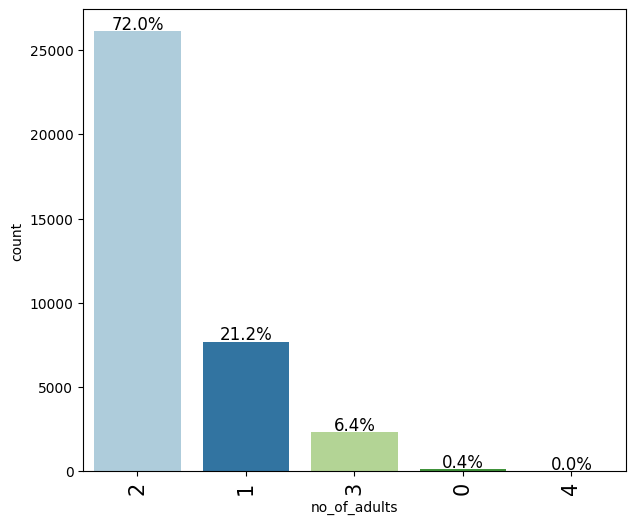

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

##### **Observations**
*   72% of the reservation of room has atleast 2 adults. There are around 21% of reservations with 1 adult.



#### Number of Children

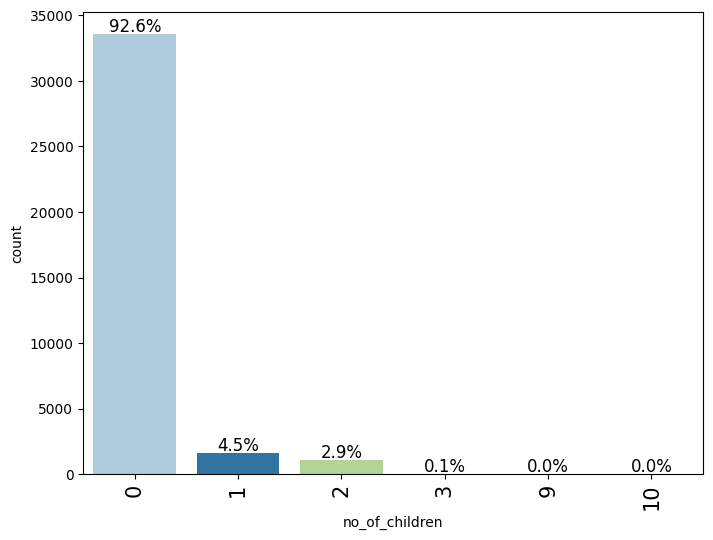

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)

**Observations**
*   92% of the reservations has no children in the booking. There are some rows in the dataset with values as 9 and 10 children which needs to be addressed.


In [ ]:
# check the counts of the number of children
data['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

There are only 3 rows with 9 and 10 children. Hence lets replace it with 3.

In [ ]:
# lets replace 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

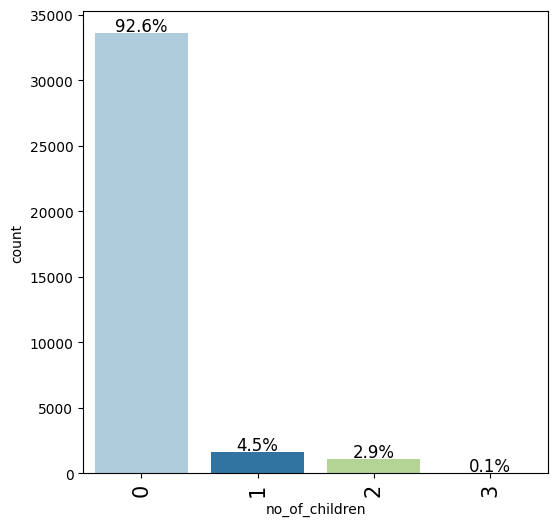

In [ ]:
# Check the distribution after the replacement of the children values
labeled_barplot(data, "no_of_children", perc=True)

##### **Observations**

The no.of.children values 9,10 have been replaced with 3.





#### Number of Weekend Nights

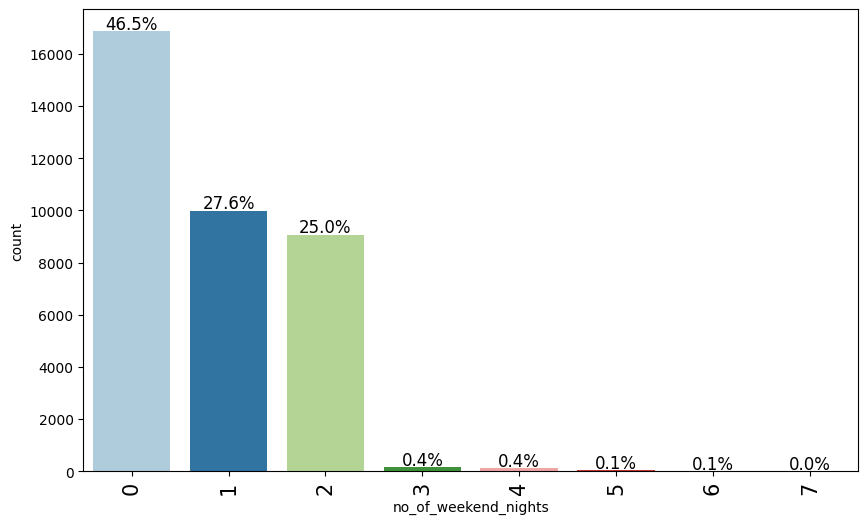

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

##### **Observations**
*   27.6% of bookings have atleast 1 weekend night. 25% of the bookings ie., about 9000 bookings have reserved two weekend nights.
*   Very few bookings have reserved for 3 or 4 weekend nights.



#### Number of Week Nights

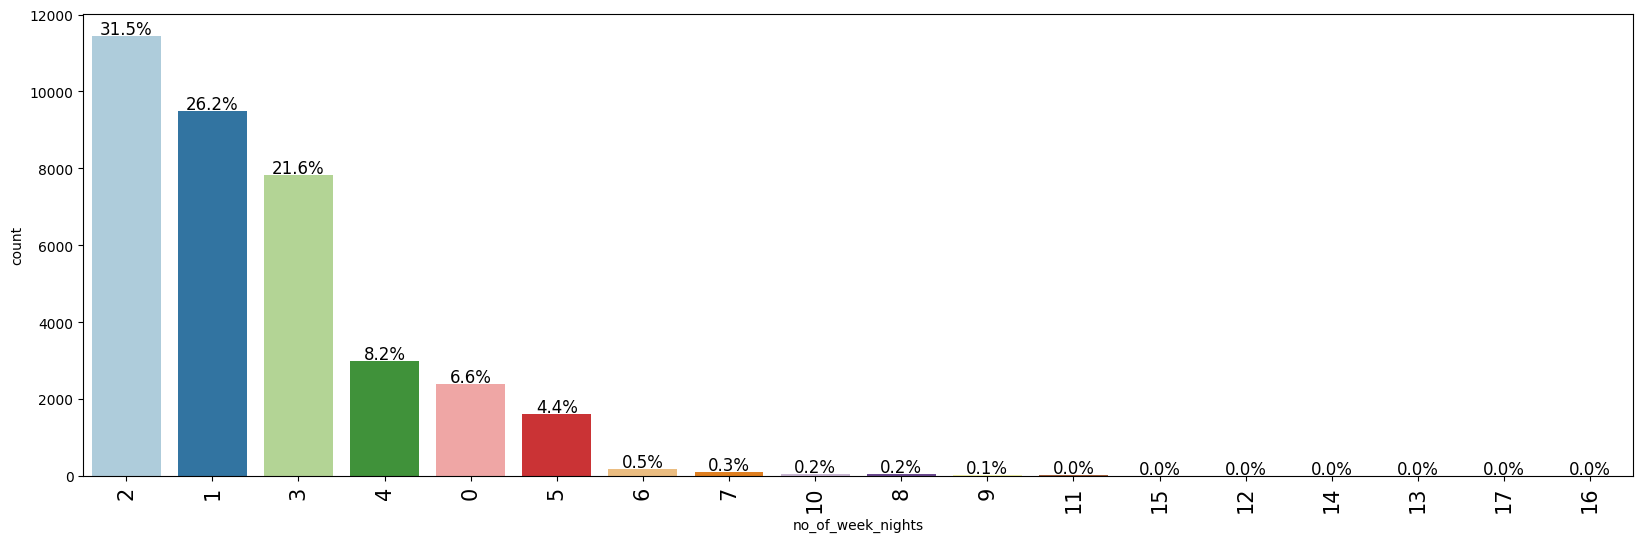

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)

##### **Observations**
*   31.5% of the bookings made by customers stayed for 2 week nights. 4% of the bookings made by the customers stayed for 5 week nights.



#### Required Car Space

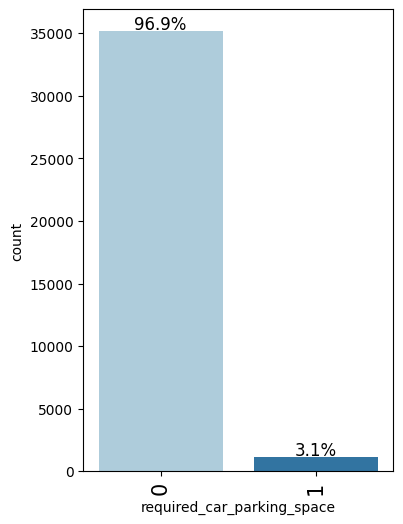

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)

##### **Observations**
*   97% of the bookings did not reserve car parking space. Fewer than 3% have opted to reserve the car parking space.


#### Type of Meal Plan

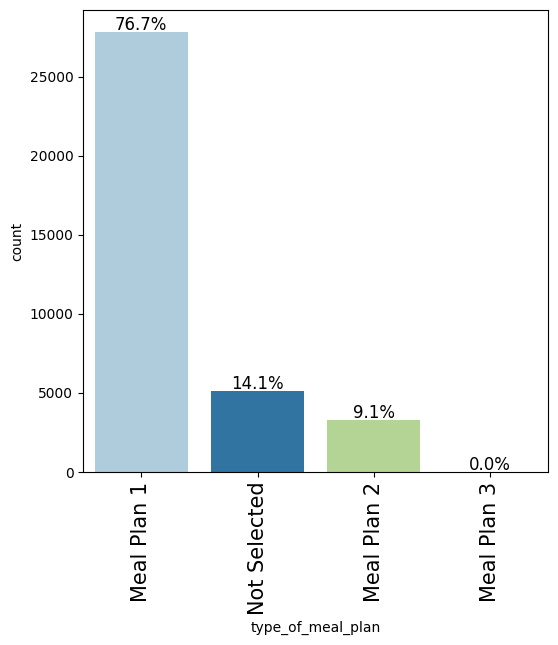

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

##### **Observations**
*   76% of the bookings in the INN Hotels dataset have opted for Meal Plan 1.



#### Type of room reserved

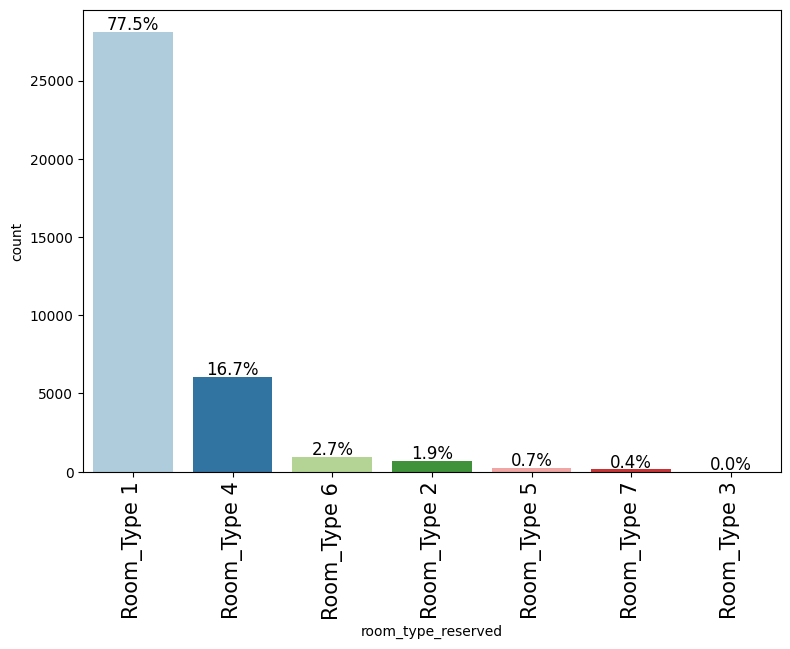

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)

##### **Observations**
*   Almost 77% of the bookings have opted for Room_Type1. Close to 17% of the bookings reserved Room_Type 4. Very few bookings have reserved the Type 5 and Type 7 rooms.



#### Market Segment Type

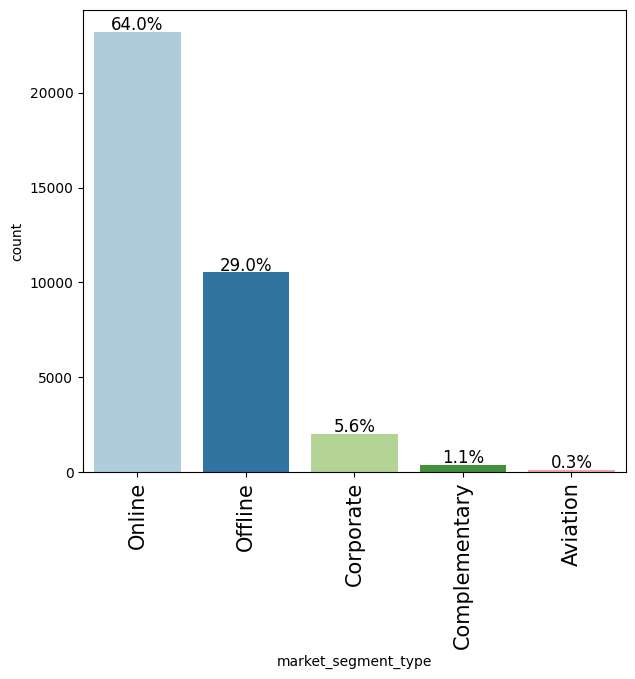

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

##### **Observations**
*   64% of bookings are made through Online. 29% of the bookings are made Offline probably through phone calls. 5.6% of the bookings are reserved by Corporate.



#### Repeated Guests

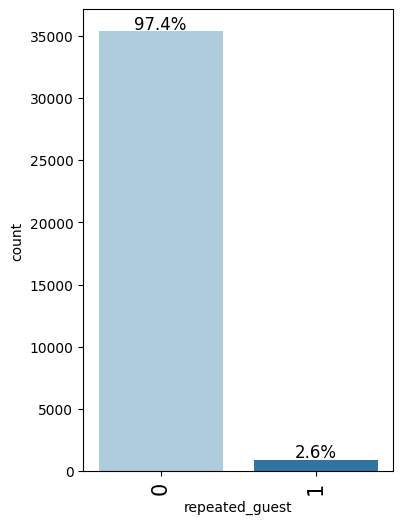

In [ ]:
labeled_barplot(data, "repeated_guest", perc=True)

##### **Observations**
*   Only 1% of the bookings are made by the same guests who have stayed before in the INN Hotels.



#### Number of Special Requests

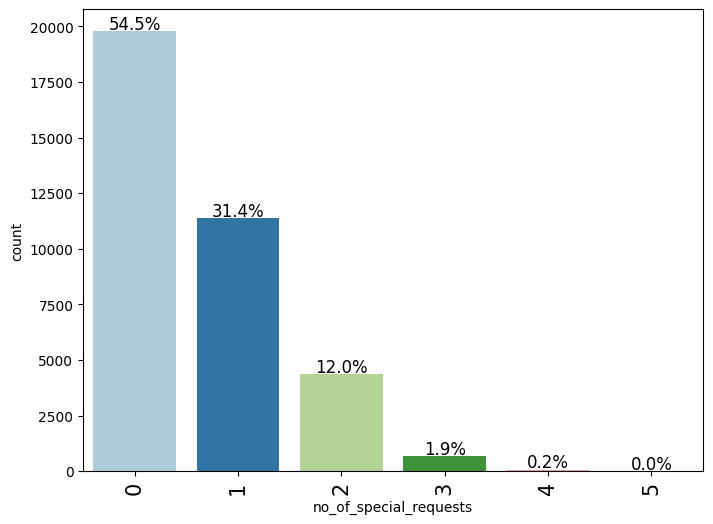

In [ ]:
labeled_barplot(data, "no_of_special_requests", perc=True)

##### **Observations**
*   31% of the bookings have made for 1 special request. 12% of the bookings have made 2 Special requests.
*   About 55% of the bookings have no special requests.


#### Lead Time

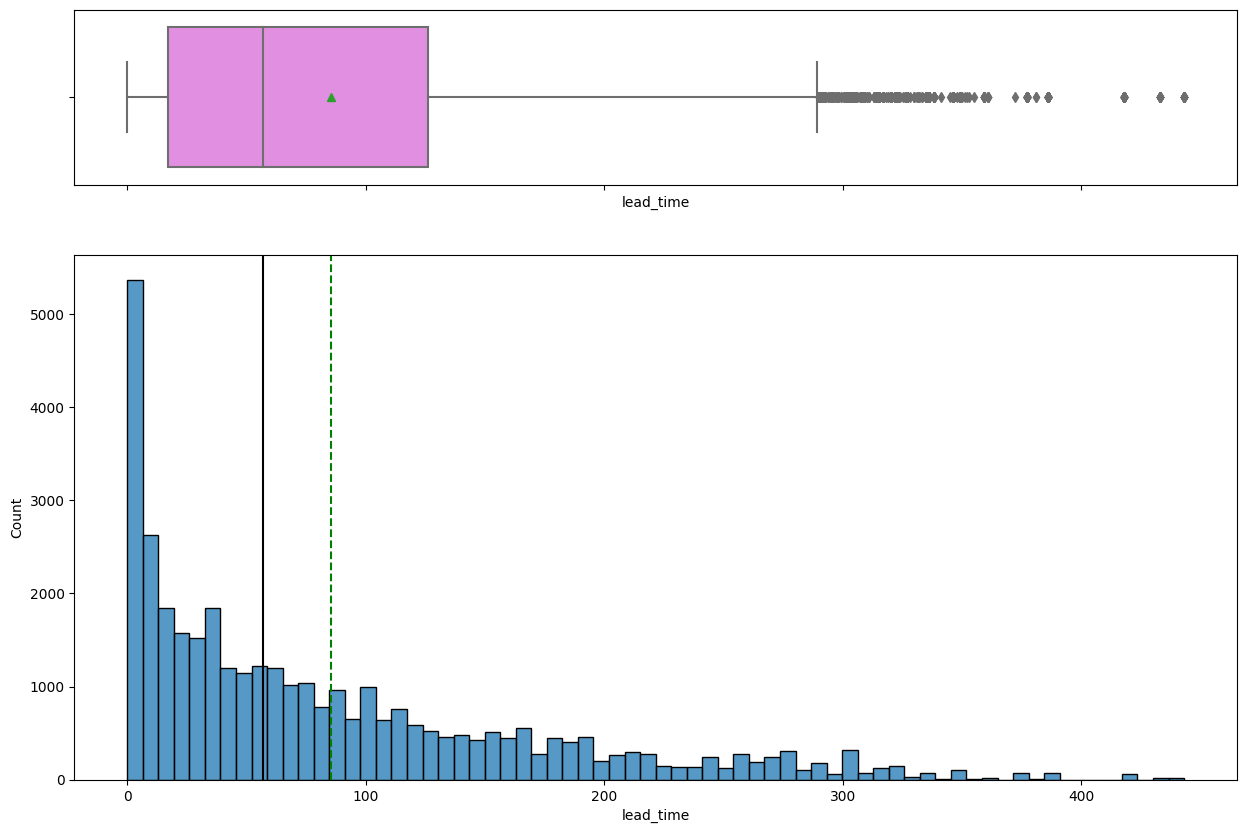

In [ ]:
histogram_boxplot(data, "lead_time")

##### **Observations**
*   The average number of bookings for INN Hotels were made 85 days prior to the arrival date.
*   There are few bookings that were made more than one year prior to the actual arrival date.



#### Number of Previous Booking Cancellations

In [ ]:
data['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

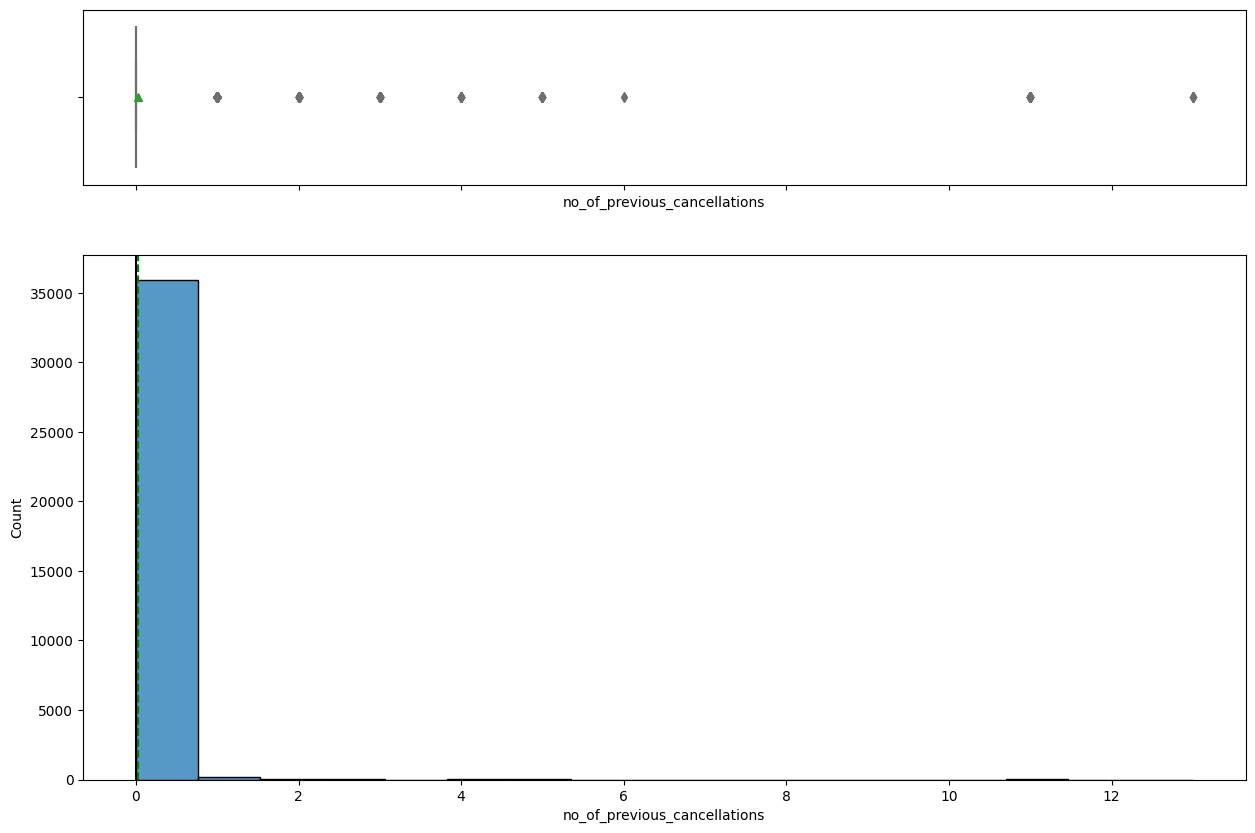

In [ ]:
histogram_boxplot(data, "no_of_previous_cancellations")

##### **Observations**
*   There are about 13 cancellations made by four customers on the previous bookings.
*   There are about 11 cancellations made by 25 customers on the previous bookings.



#### Number of Previous Bookings Not Canceled

In [ ]:
data['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

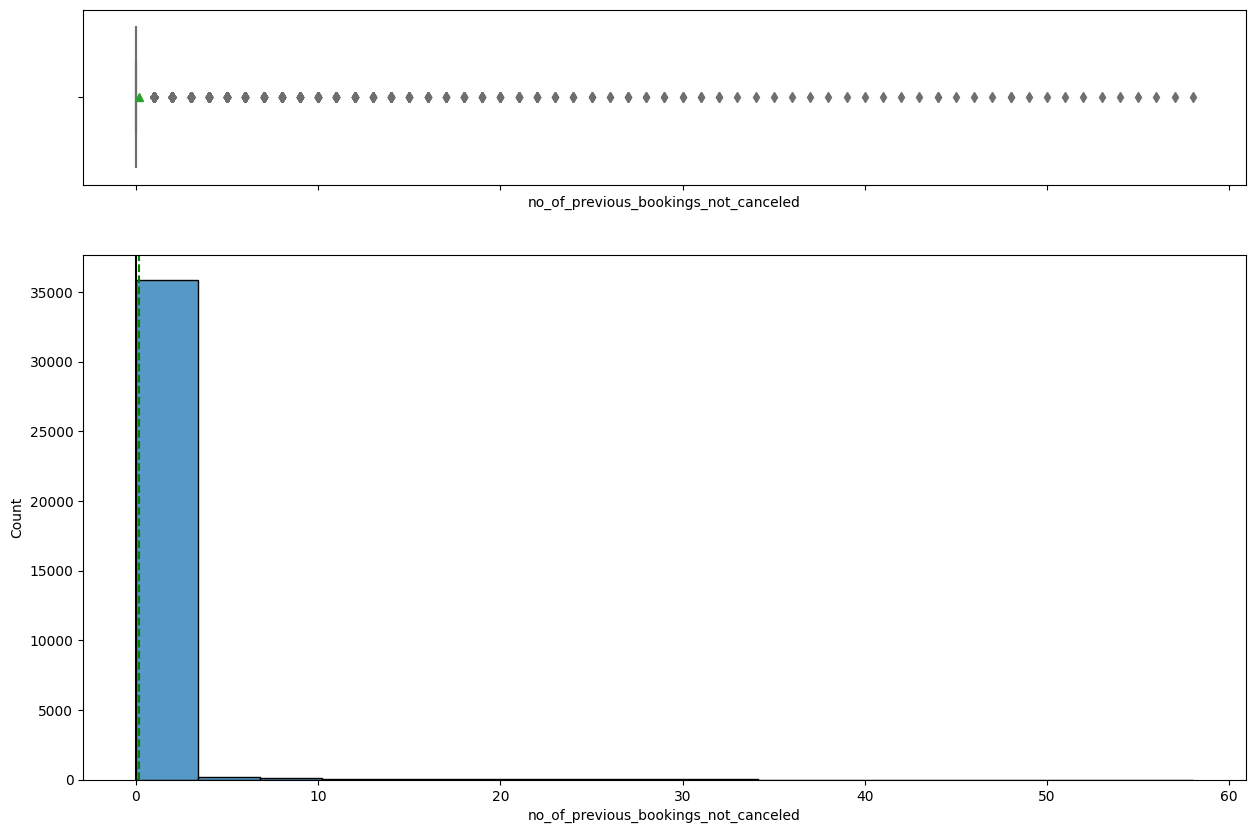

In [ ]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

##### **Observations**
There are about 35463 customers who didnt not cancel their previous bookings.

#### Average Price per room

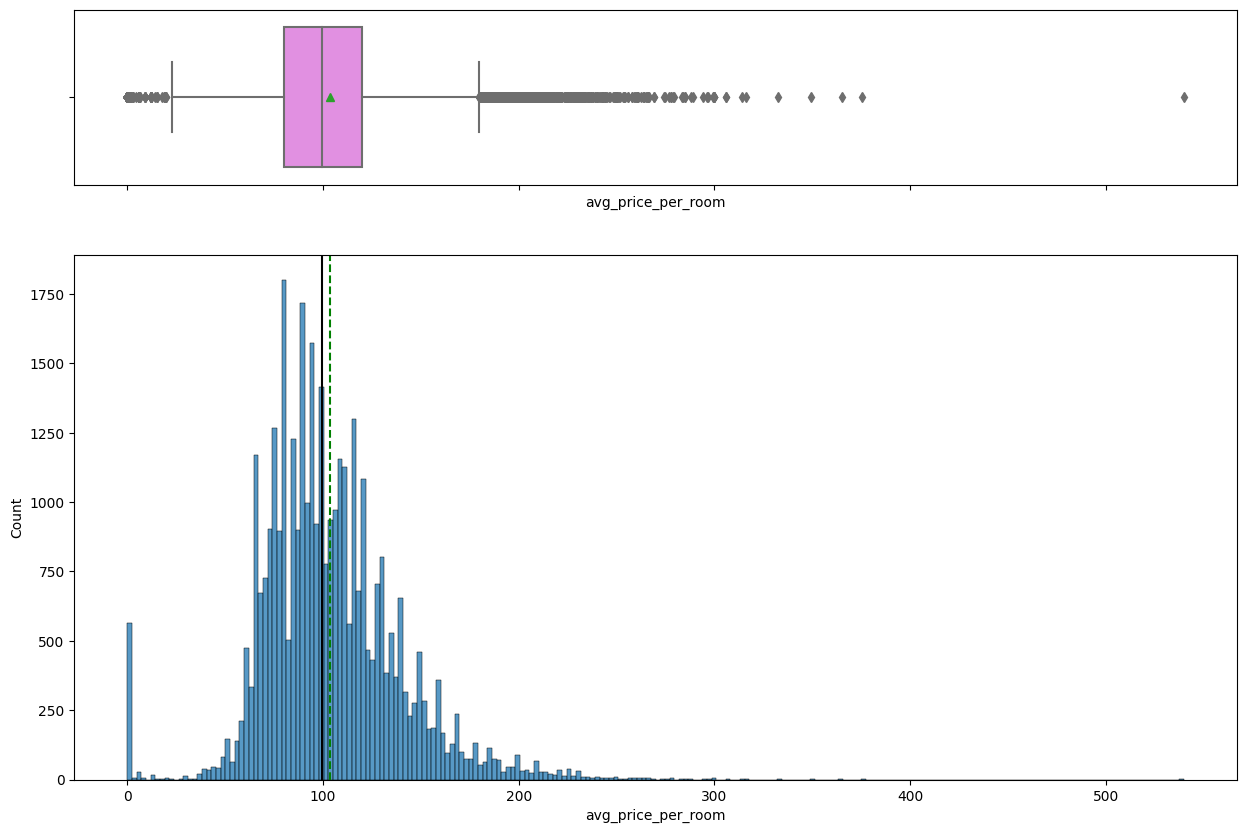

In [ ]:
histogram_boxplot(data, "avg_price_per_room")

In [ ]:
data[data['avg_price_per_room']==0].shape

(545, 18)

There are 545 rows where average price per room is 0. Most of which has to be the booking of the complimentary market segment type and also some might be bought with the points saved making the total cost of the room zero.

In [ ]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [ ]:
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"]

33114   540.00000
Name: avg_price_per_room, dtype: float64

From the above histogram boxplot we were able to see that there is a room which costs about 540 euros and it is a outlier as all the other rooms in the dataset costs an average less than 400 euros. Hence lets treat this outlier.

In [ ]:
# Calculate the 25th, 75th quantile and IQR
Q1 = data['avg_price_per_room'].quantile(0.25)
Q3 = data['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1
# Calculate the Upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# assigning the upper whisker value to the outlier
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

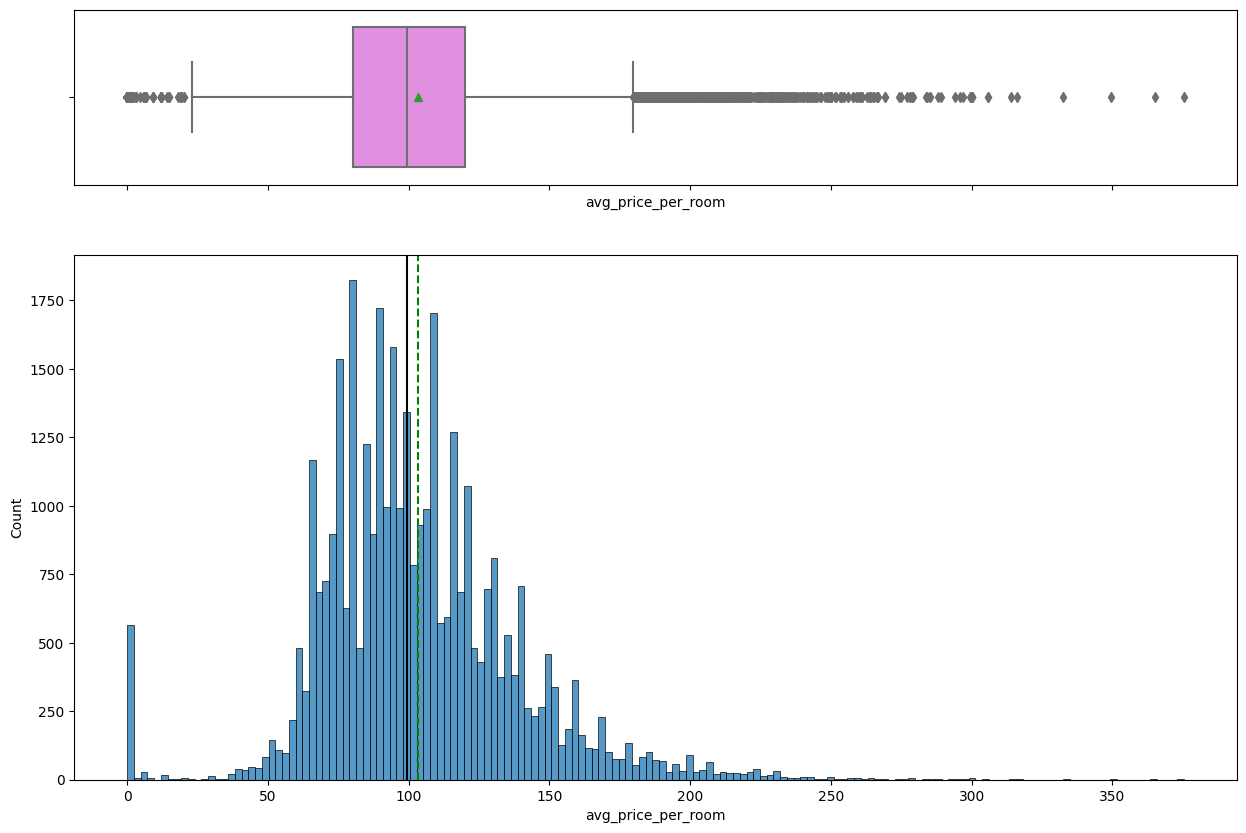

In [ ]:
# Check whether the outlier is treated
histogram_boxplot(data, "avg_price_per_room")

#### Booking status

In [ ]:
# check the counts of the booking status
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

There are about 24390 bookings not canceled. Rest of the bookings are canceled.

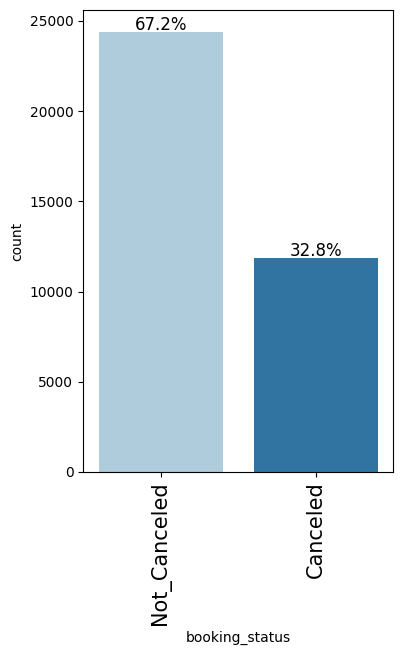

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

**Observations**
*   Around 67% of the bookings were not canceled and remaining 33% of the bookings are canceled.



As Booking status is the target variable lets encode the categories of canceled and not canceled to 1 and 0.

In [ ]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

The target variable booking_status has been encoded properly with 1's and 0's.

#### Arrival Month

In [ ]:
# Fetching the cancelation data
cancelation_per_month = data.loc[data['booking_status'] == 1]
cancelation_per_month.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
2              1               0                     2                  1   
3              2               0                     0                  2   
4              2               0                     1                  1   
5              2               0                     0                  2   
12             2               0                     2                  1   

   type_of_meal_plan  required_car_parking_space room_type_reserved  \
2        Meal Plan 1                           0        Room_Type 1   
3        Meal Plan 1                           0        Room_Type 1   
4       Not Selected                           0        Room_Type 1   
5        Meal Plan 2                           0        Room_Type 1   
12      Not Selected                           0        Room_Type 1   

    lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
2           1          2018              2            28              Online   
3         211          2018              5            20              Online   
4          48          2018              4            11              Online   
5         346          2018              9            13              Online   
12         30          2018             11            26              Online   

    repeated_guest  no_of_previous_cancellations  \
2                0                             0   
3                0                             0   
4                0                             0   
5                0                             0   
12               0                             0   

    no_of_previous_bookings_not_canceled  avg_price_per_room  \
2                                      0            60.00000   
3                                      0           100.00000   
4                                      0            94.50000   
5                                      0           115.00000   
12                                     0            88.00000   

    no_of_special_requests  booking_status  
2                        0               1  
3                        0               1  
4                        0               1  
5                        1               1  
12                       0               1

In [ ]:
# check the count of cancelations on each month
cancelation_per_month['arrival_month'].value_counts()

10    1880
9     1538
8     1488
7     1314
6     1291
4      995
5      948
11     875
3      700
2      430
12     402
1       24
Name: arrival_month, dtype: int64

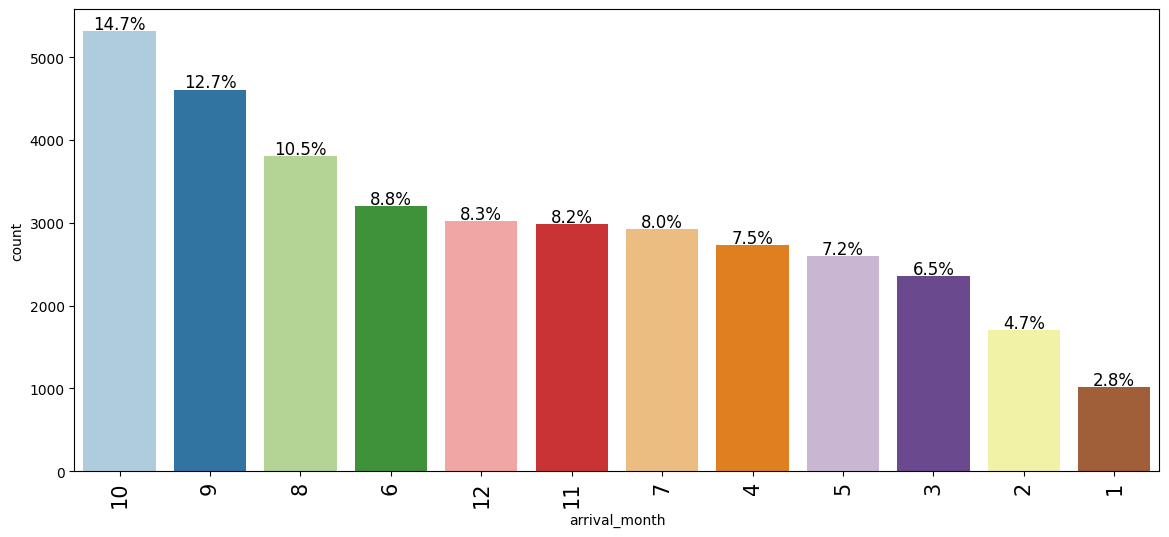

In [ ]:
# Total Bookings on each month
labeled_barplot(data, "arrival_month", perc=True)

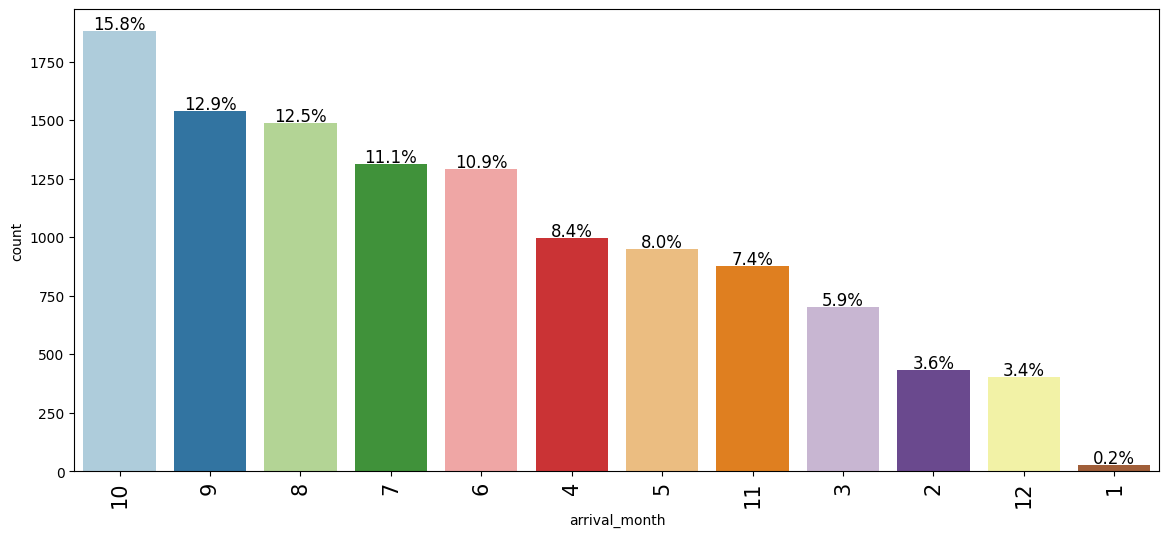

In [ ]:
# Total cancelations on each month
labeled_barplot(cancelation_per_month, "arrival_month", perc=True)

##### **Observations**
*   Around 15% of the bookings were made in the month of October. The least number of bookings(2.8%) have been made in the month of January. The number of booking cancelations were also high in the month of october followed by september and August.



### Bivariate Analysis

#### Correlation check

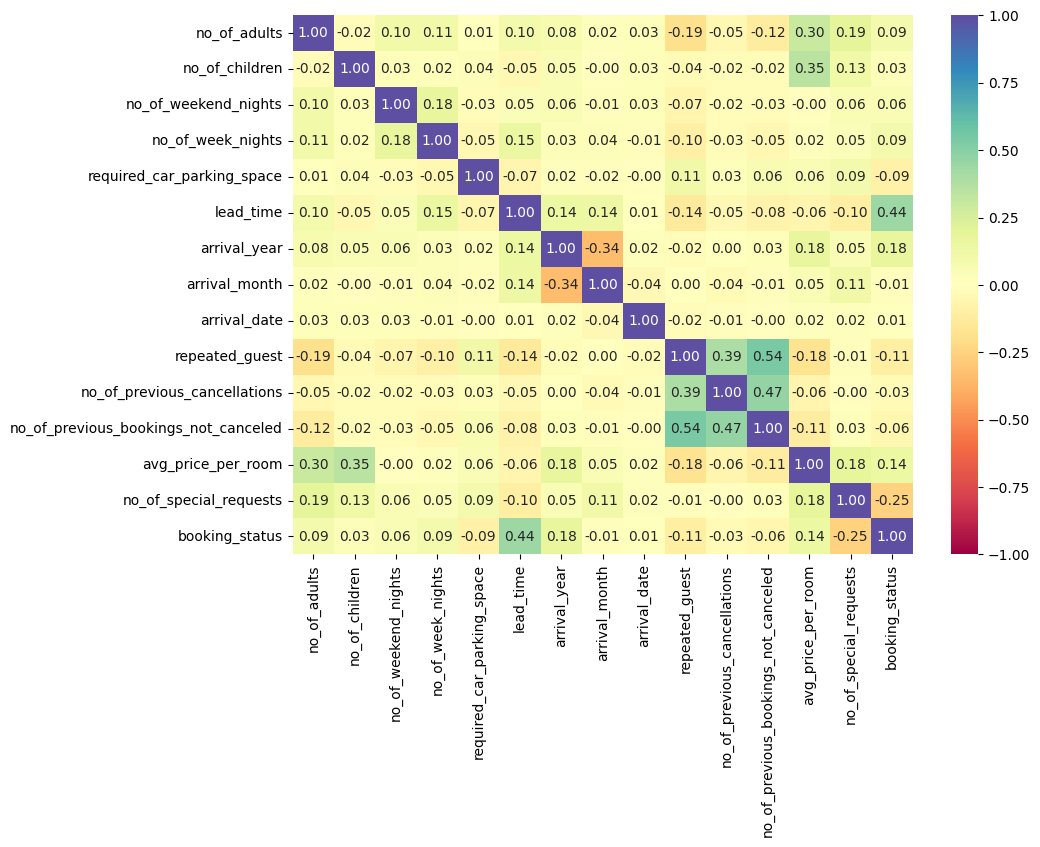

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##### **Observations**
*   The variables booking_status and lead time have good positive correlation. Also the booking_status is positively correlated with avg_price_per_room.
*   The variable repeated_guests has positive correlation with the no_of_previous_cancellations meaning if the customer has made very less number of cancelations on their previous booking are likely to be a regular customer or repeated customer for the INN Hotels.
*   The no_of_special_requests is negatively correlated with the booking_status meaning the more the number of special requests made by the customer the less likely they are to cancel their booking.



#### Busiest Months in the INN Hotels

In [ ]:
# Finding the counts of customers booked on each month
busy_months = data['arrival_month'].value_counts().sort_index()
busy_months

1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: arrival_month, dtype: int64

In [ ]:
# creating a dataframe with months and count of customers in each month
monthly_bookings = pd.DataFrame({"Month": busy_months.index, "Total Customer Bookings": busy_months.values})
monthly_bookings

Month  Total Customer Bookings
0       1                     1014
1       2                     1704
2       3                     2358
3       4                     2736
4       5                     2598
5       6                     3203
6       7                     2920
7       8                     3813
8       9                     4611
9      10                     5317
10     11                     2980
11     12                     3021

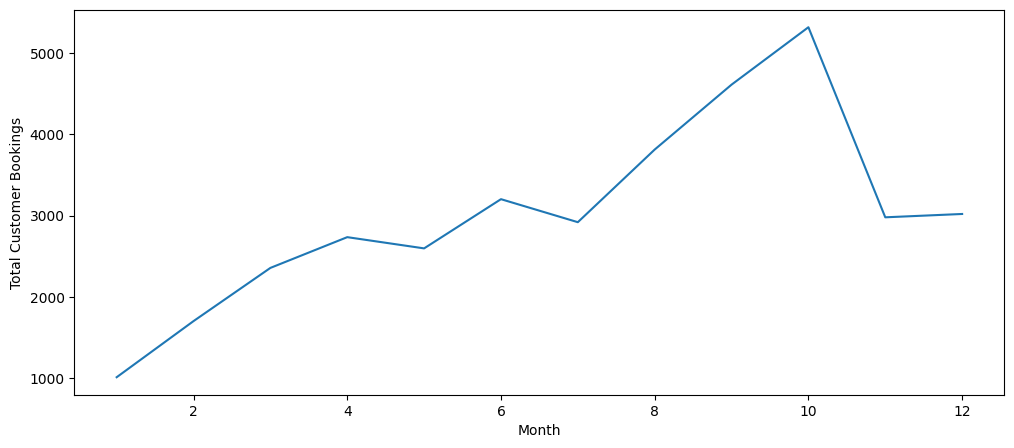

In [ ]:
# Visualize the trend in each month using line plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_bookings, x="Month", y="Total Customer Bookings")
plt.show()

##### **Observations**
*   The total number of bookings is high during the month of October.
*   The months August, September and October are the busiest months with october being the highest in terms of bookings.



#### Arrival Month vs Average price per room

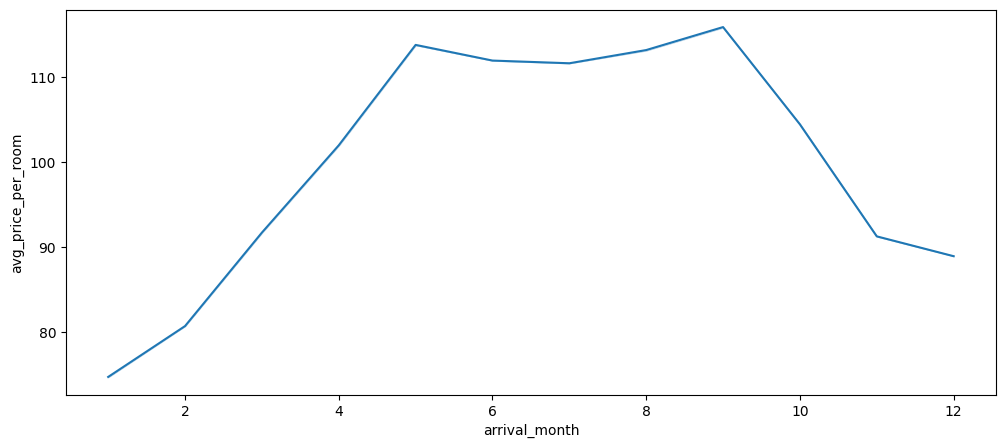

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=data,x="arrival_month",y="avg_price_per_room",ci=False)
plt.show()

##### **Observations**
*   The average price per room increases steaply from the month of January to May. During the months of May till September there is a dip in price from June till August then there is a steady increase in september.
*   From the months of September to December the average price per room steadily drops.



#### Arrival Month vs Booking status

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


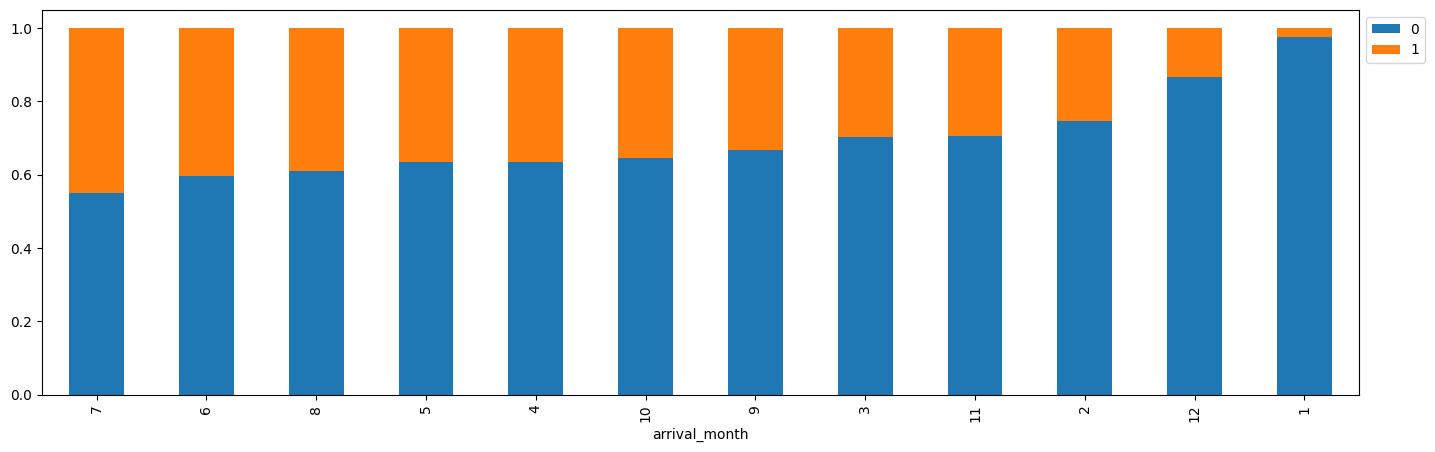

In [ ]:
# Visualize the realtionship of arrival month and the booking status
stacked_barplot(data, "arrival_month", "booking_status")

##### **Observations**
*   Around 50% of the bookings made in the month of July is canceled. The second highest cancelation month is June and August with 40% cancelations.
*   The least percentage of 10% and 1% cancelations happened in the month of December and January.



#### Market segment type vs Average price per room

Lets check the relation between market segment and the corresponding average price per room using boxplot.

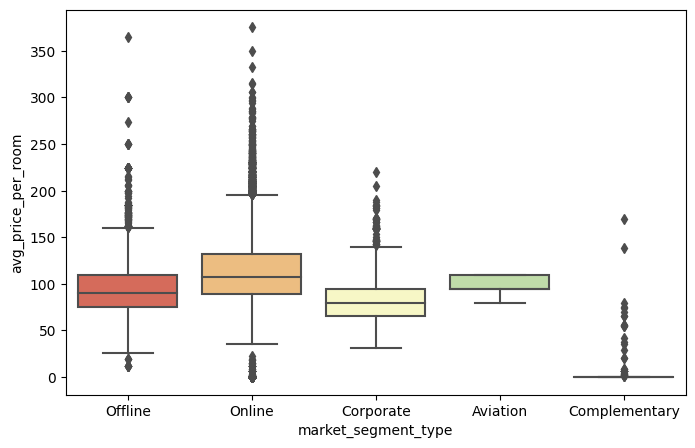

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room", palette="Spectral")
plt.show()

##### **Observations**
*   The Online market segment has the median avg_price_per_room greater than all the other market segments.
*   The average price per room of the Complimentary market segment type is zero for most of the bookings except for a few which lies below 200 euros.
*   The median avg_price_per_room for Corporate market segment type is less compared to Online and Offline market segment as the corporate discount rates will be applied during booking.


#### Market Segment type vs Booking status

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


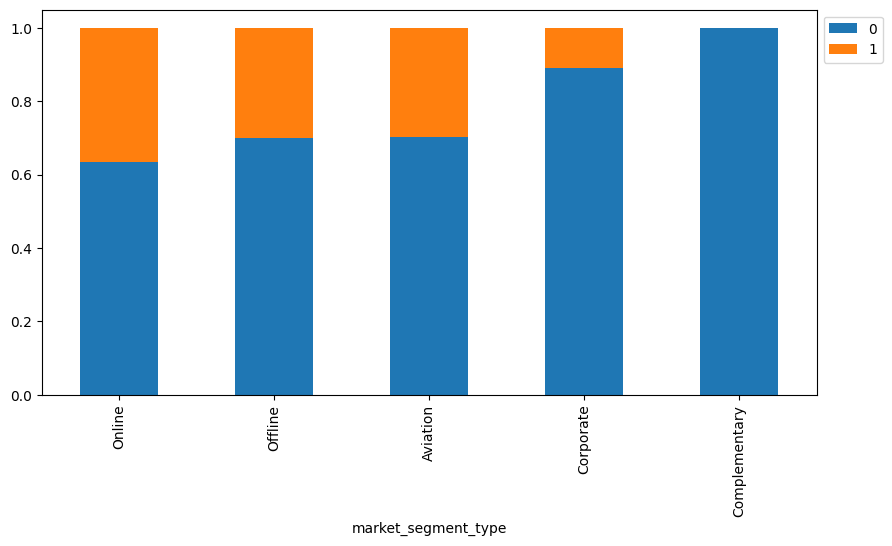

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

##### **Observations**
*   There are more number of Online bookings that are canceled (around 8475) compared to all the other market segment types.
*   None of the complementary bookings are canceled.



#### No.of Special requests vs Average price per room

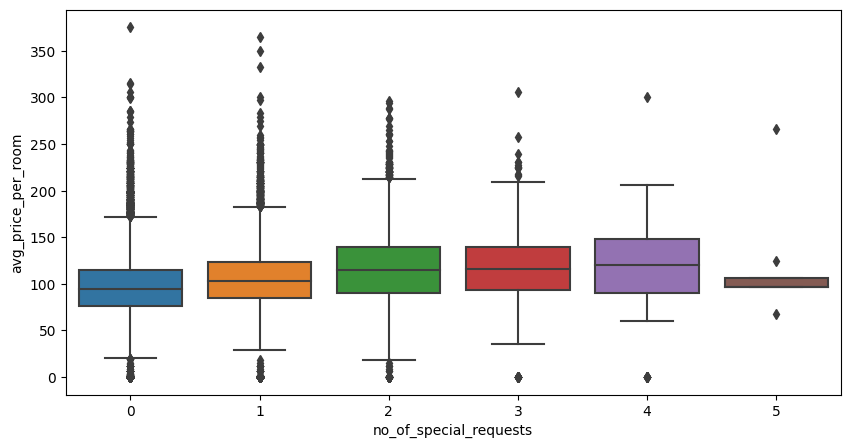

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x= "no_of_special_requests", y= "avg_price_per_room");

##### **Observations**
*   From the above boxplot we can say that when the number of special requests made by the customer is 5, then the average price per room is less.
*   The median value of the average price per room is almost same and is equal to around 120 for customers who made 2,3 or 4 special requests.



#### No. of Special requests vs Booking status

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


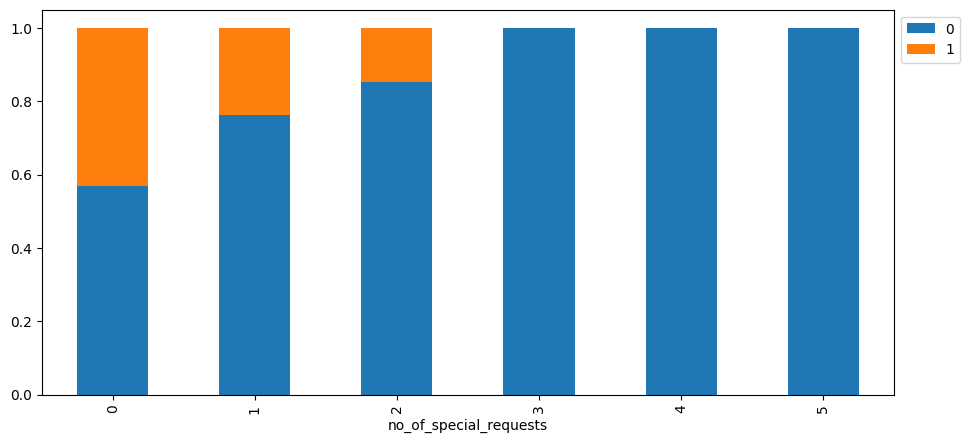

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

##### **Observations**
*   The customers who made more than three special requests did not cancel their booking.
*   About 2703 customers who made 1 special request canceled their booking.



#### Average price per room vs Booking status

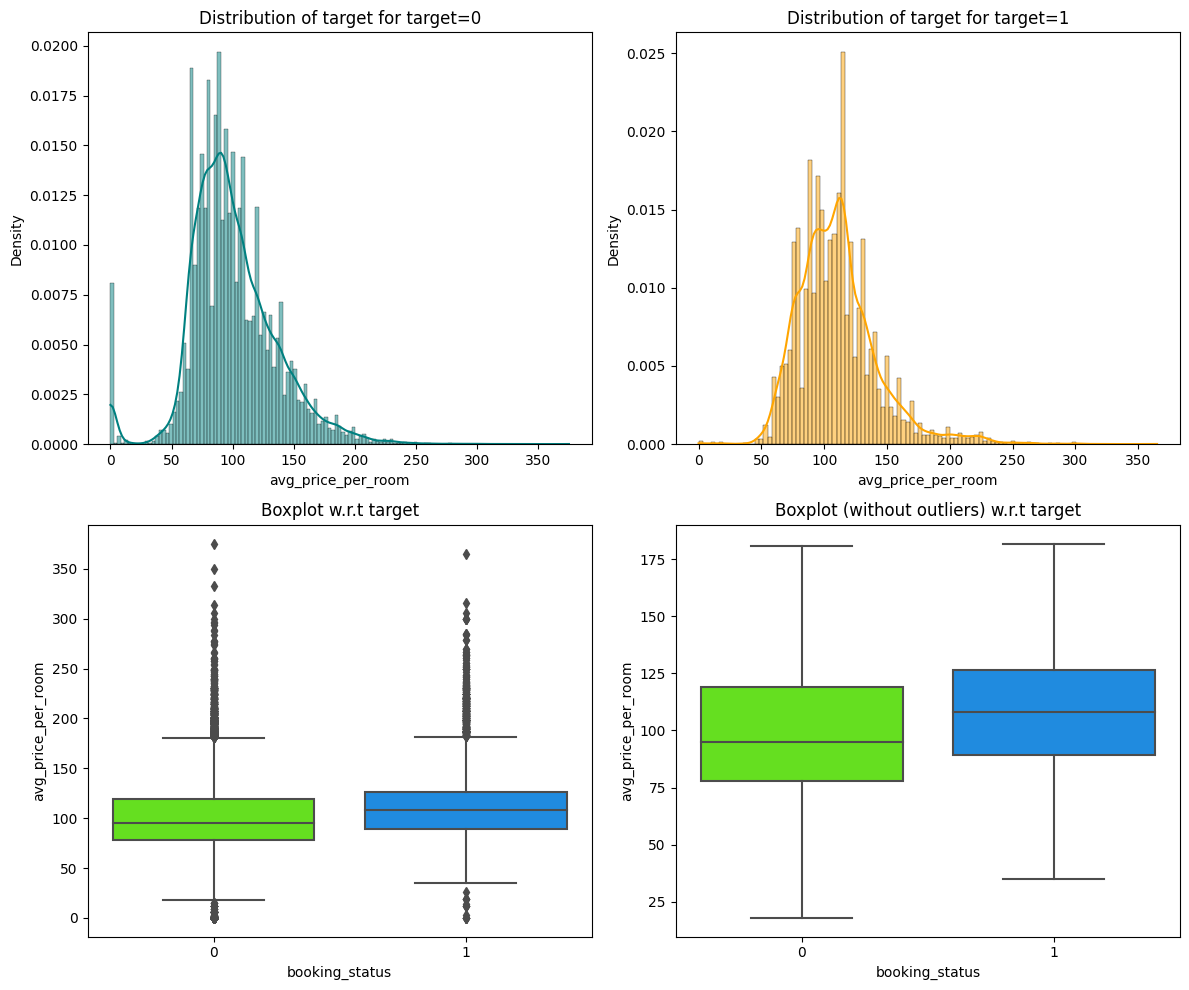

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

##### **Observations**
*   The median average price per room for bookings that got canceled is around 110 euros and it is less than the median average price per room of the reservations not canceled. It gives an idea that more the price of the room there is more likelyhood of cancelation as the customers might have got good deal on other hotels.



#### Repeated Guests vs Booking status

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


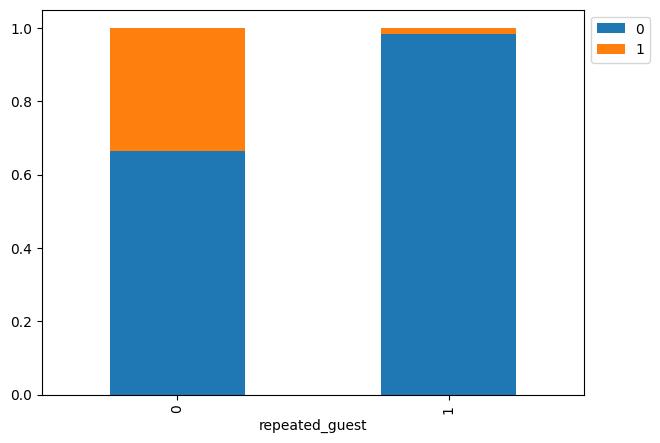

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status")

##### **Observations**
*   Only 16 repeated guests have canceled the booking and rest of the 914 repeated guests have not canceled.



#### Lead time vs Booking status

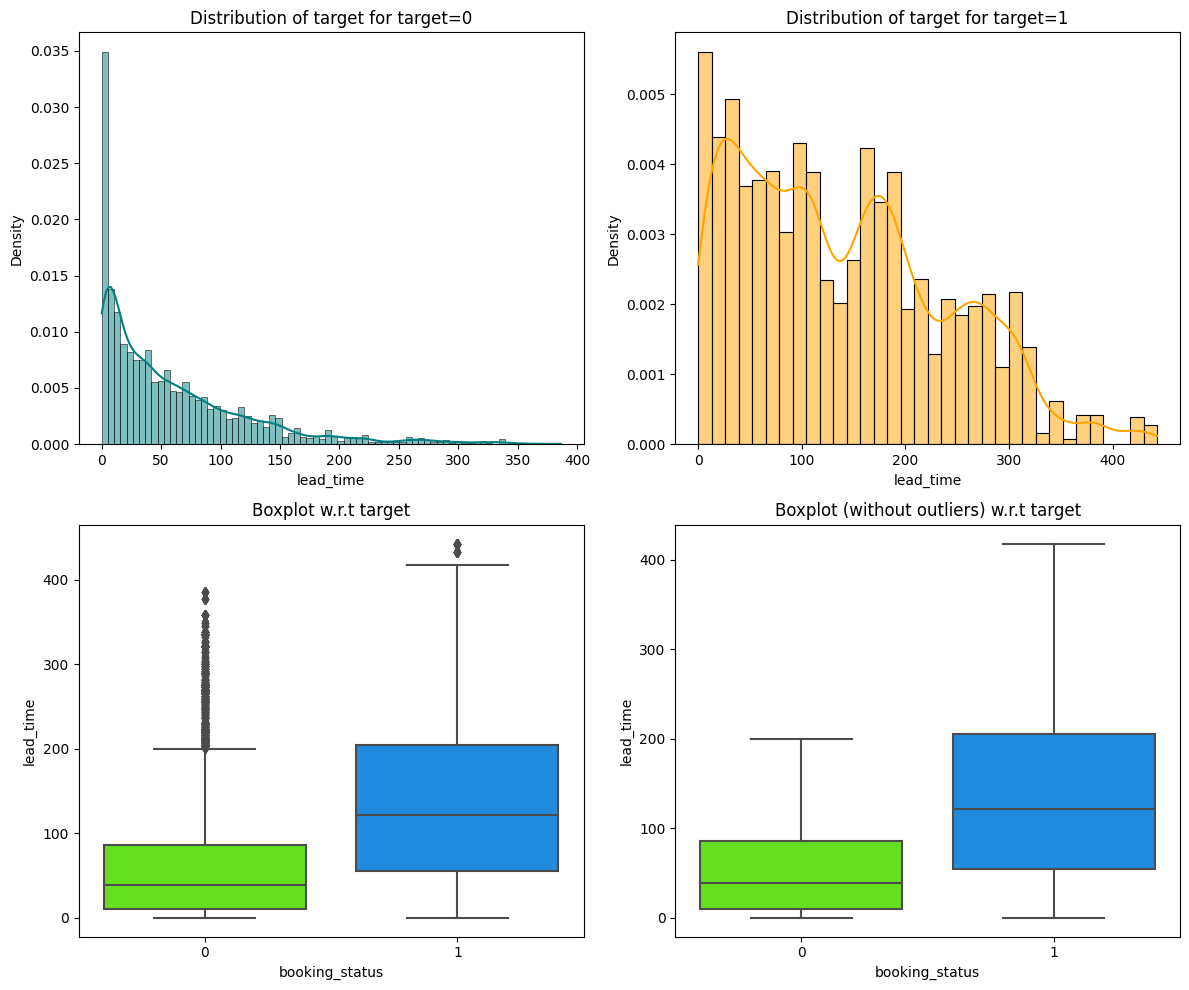

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

##### **Observations**
*   Customers who made the reservation in INN Hotels a lot earlier than 1 year have canceled their booking. The less lead time between the booking and the arrival date the less likely the booking got canceled.



#### No. of days stayed vs Booking status

Lets calculate the minimum number of weekdays and weekends the customer stayed in INN Hotels.

In [ ]:
# Calculate the no.of week nights and no.of weekends greater than 0
customer_stay = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
customer_stay.shape

(17094, 18)

In [ ]:
# calculate the total number of days a customer stayed
customer_stay["total_days"] = (customer_stay["no_of_week_nights"] + customer_stay["no_of_weekend_nights"])

In [ ]:
customer_stay.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
4             2               0                     1                  1   
6             2               0                     1                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
4      Not Selected                           0        Room_Type 1         48   
6       Meal Plan 1                           0        Room_Type 1         34   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
4          2018              4            11              Online   
6          2017             10            15              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
4               0                             0   
6               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
4                                     0            94.50000   
6                                     0           107.55000   

   no_of_special_requests  booking_status  total_days  
0                       0               0           3  
1                       1               0           5  
2                       0               1           3  
4                       0               1           2  
6                       1               0           4

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

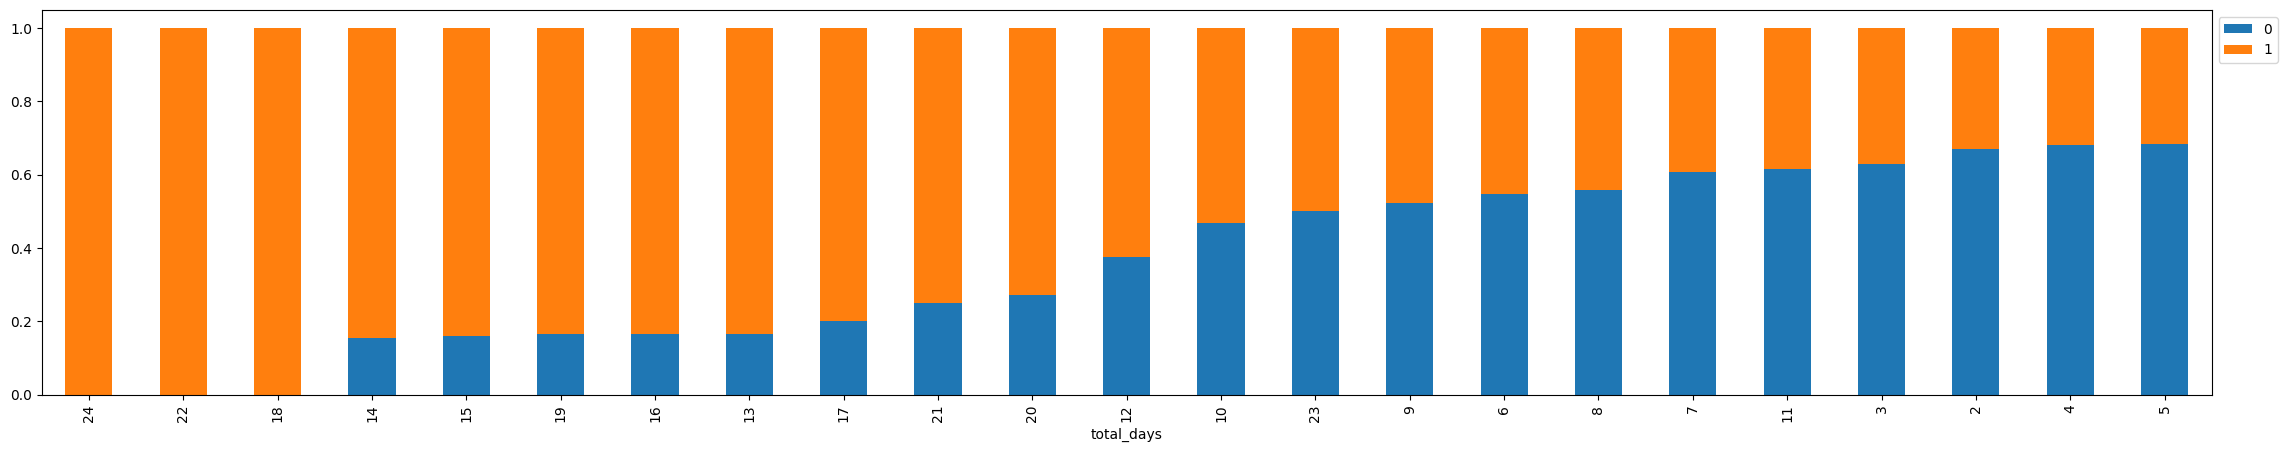

In [ ]:
# Visualize the realtionship of total days customer stayed and the booking status
stacked_barplot(customer_stay, "total_days", "booking_status")

##### **Observations**
*   There are about 2183 customers who specified their number of days of stay as 3 in the booking have canceled their reservation.
*   The probability of cancelation is more for customers who specified their stay to be more than 12 days.



#### **EDA Summary of Observations**
*   The INN Hotels have highest number of bookings in the month of October followed by September and August. Hence the INN Hotels must assign more human resources during these busy months.
*   The reservations through the Online market segment is high compared to all the other market segment.
*   The Online market segment has the median avg_price_per_room greater than all the other market segments. The median avg_price_per_room for Corporate market segment type is less compared to Online and Offline market segment as the corporate discount rates will be applied during booking.
*   Around 50% of the bookings made in the month of July is canceled. The second highest cancelation month is June and August with 40% cancelations. The least percentage of 10% and 1% cancelations happened in the month of December and January.
*   Only 16 repeated guests have canceled the booking and rest of the 914 repeated guests have not canceled.
*   The customers who made more than three special requests did not cancel their booking. About 2703 customers who made 1 special request canceled their booking.
*   Customers who made the reservation in INN Hotels a lot earlier than 1 year have canceled their booking. The less lead time between the booking and the arrival date the less likely the booking got canceled.
*   The probability of cancelation is more for customers who specified their stay to be more than 12 days.

## Data Preprocessing


**There are no missing values in the INN Hotels dataset. Hence missing value treatment is not necessary. Lets check for outliers in the dataset and treat them if neccesary and then prepare the data for modeling.**

### Outlier Detection and Treatment

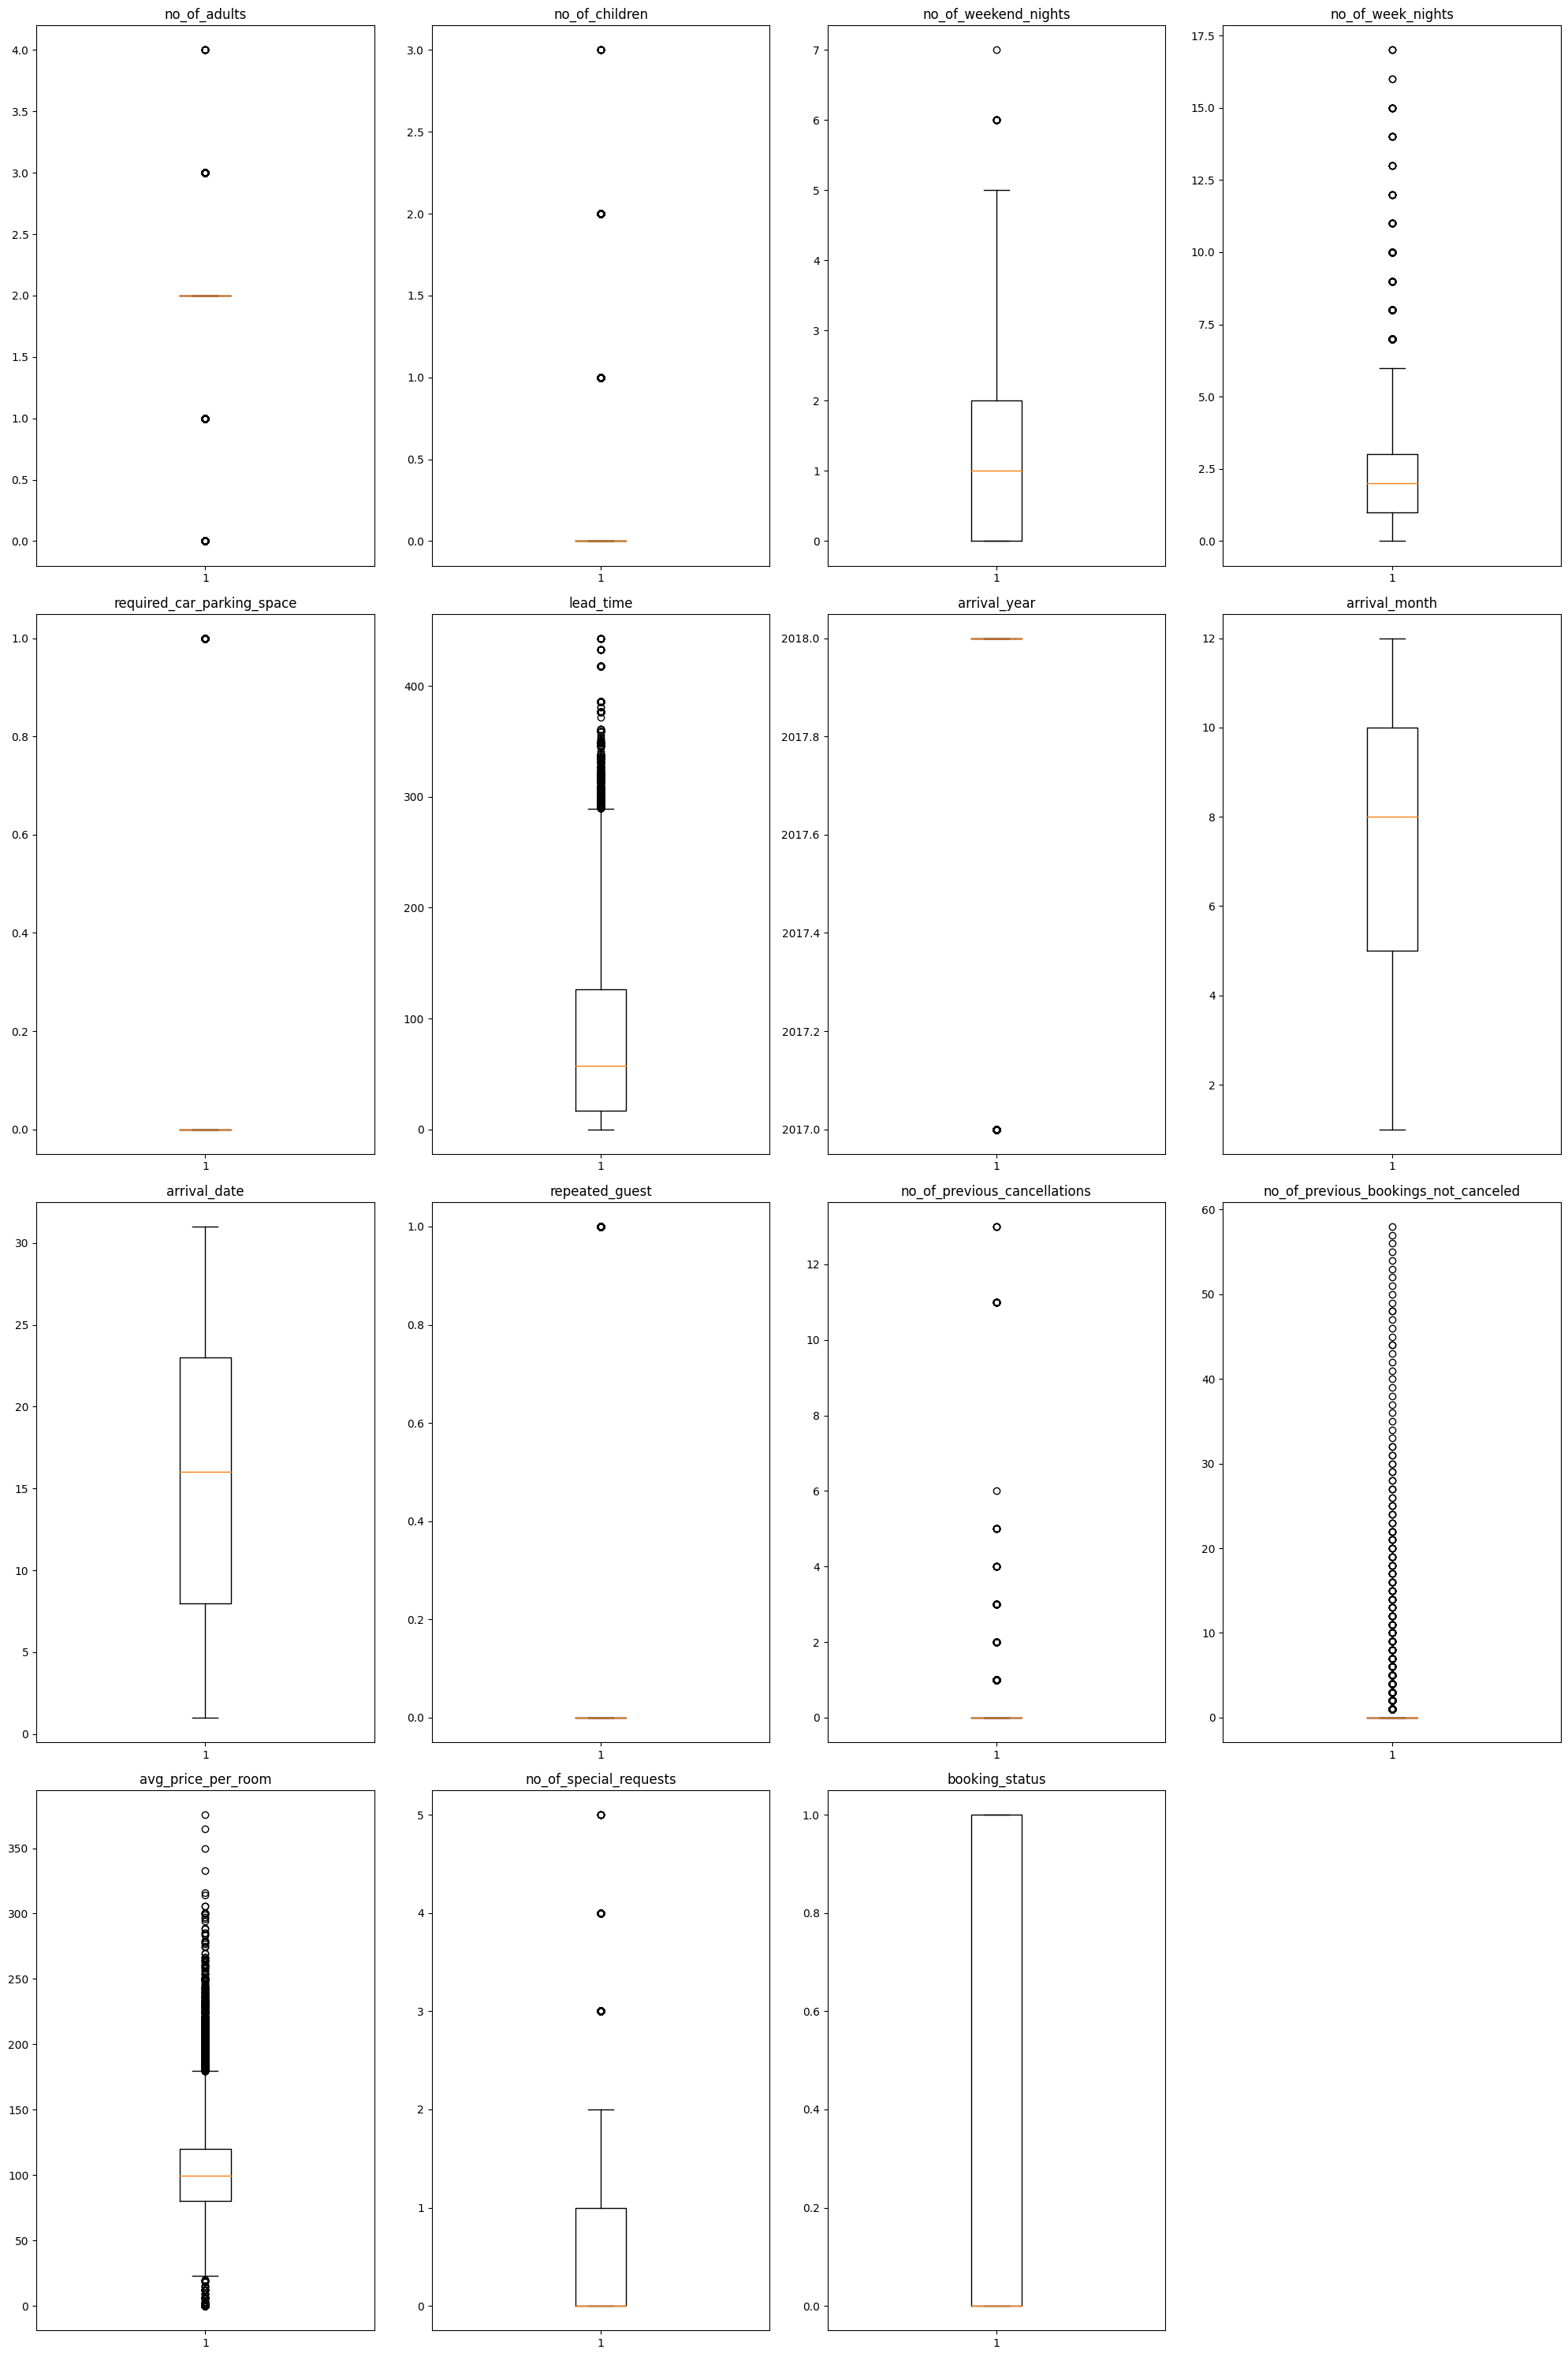

In [ ]:
# Select all the numerical variables and assign it to numerical_col
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

There are some outliers on both sides of the whisker in few variables. But these are actual values and not very extreme values. Hence Outlier treatment is not needed.

### Data Preparation for Modeling

*   Lets split the INN Hotels data into train and test datasets to evaluate the model that we build on the training data.
*   We need to predict whether the booking of the room in INN Hotels will get canceled or not. We have already encoded the booking_status variable into 1's and 0's.



**Creating train and test sets**

In [ ]:
# specifying the independent  and dependent variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Observations**

Around 67% of observations belongs to class 0 (Bookings Not Canceled) and 33% observations belongs to class 1 (Bookings Canceled), and this is preserved in the train and test sets.

## Model Building -  Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.3292
Time:                        16:09:37   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

**Observations**

- Negative values of the coefficient show that the probability of a customer canceling their booking of the INN Hotels decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a customer canceling their booking of the INN Hotels increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation


**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and the hotel should bear additional costs.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled.


### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Checking the training performance**

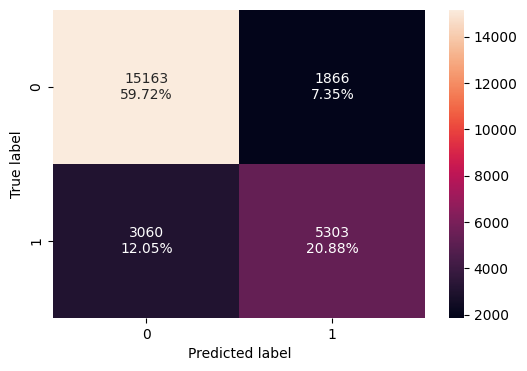

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further.
- The variables used to build the model might contain multicollinearity, which will affect the p-values.
* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

### Checking Multicollinearity



**In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.**

Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is an issue because predictor/Independent variables should be independent.

There are different ways of detecting multicollinearity such as correlation matrix, Variance Inflation factor(VIF) etc. Lets use the VIF to detect multticollinearity.

**General Rule of thumb:**
- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
# import variance_inflation_factor function from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27306
18        room_type_reserved_Room_Type 2        1.10595
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36361
21        room_type_reserved_Room_Type 5        1.02800
22        room_type_reserved_Room_Type 6        2.05614
23        room_type_reserved_Room_Type 7        1.11816
24     market_segment_type_Complementary        4.50276
25         market_segment_type_Corporate       16.92829
26           market_segment_type_Offline       64.11564
27            market_segment_type_Online       71.18026

#### **Observations**
There are no variables with VIF > 5, hence there is no multicollinearity between the independent variables of the INN hotels dataset.

### Dealing with high P-value variables

There are variables in the data having p-value > 0.05. So, they are not significant and hence lets drop them.

Sometimes p-values change after dropping a variable. Hence we will perform the following steps:
- Build a model, check the p-values of the variables, and drop the column with the highest p-value.
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
- Repeat the above two steps till there are no columns with p-value > 0.05


In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.3282
Time:                        16:10:16   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train1* as the final ones and *lg1* as final model.**

### Coefficient Interpretations

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

**Coefficient interpretations**

* lead_time: Holding all other features constant a 1 unit change in lead_time will increase the odds of a booking getting canceled by ~1.01 times or a ~58% increase in odds of booking getting canceled.
* no_of_Special_requets: Holding all other features constant a 1 unit change in the no_of_Special_requets will decrease the odds of a booking getting canceled by ~0.22 times or a ~23% decrease in odds of booking getting canceled.
* market_segment_type: The odds of a booking getting canceled when the customer chooses market segment type as corporate is ~0.45 times less than the customer who chose market segment as Online(booked through Online) or ~46% fewer odds of booking getting canceled than the customer who booked the hotel Online.

### Checking performance of the new model

**Training set performance**

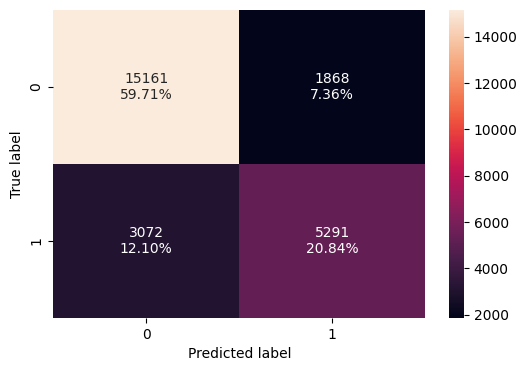

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

**Test set Performance**

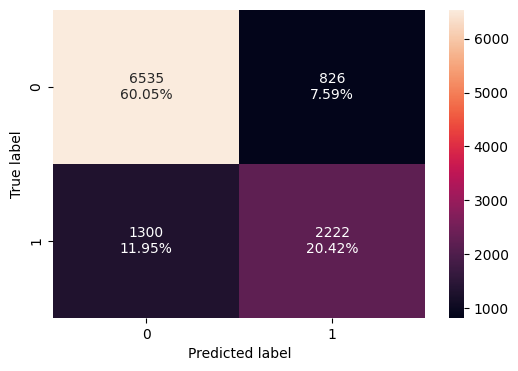

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

- The model is giving a good f1_score of ~0.68 and ~0.67 on the train and test sets respectively and also the model does not change much after removing the high p-value variables.
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

ROC-AUC on training set

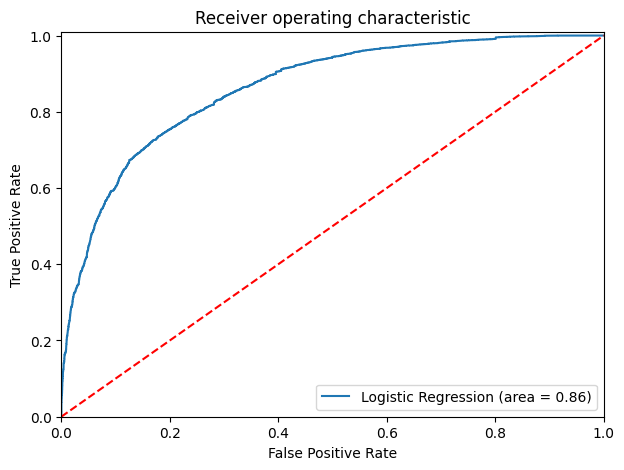

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Logistic Regression model is giving a good performance on training set.**

#### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


**Checking model performance on training set**

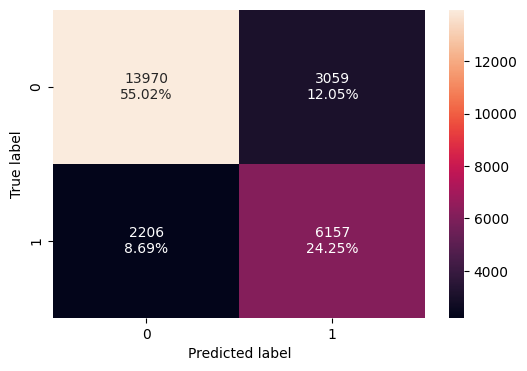

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

**Observations**
* The Precision of model has decreased.
* The accuracy has slightly reduced but not much.
* The Recall score has significantly increased meaning the number of false negatives has reduced.
* The model performance is very good. The F1 score has increased from 0.68 to 0.70.

**Checking model performance on test set**

ROC-AUC on test set

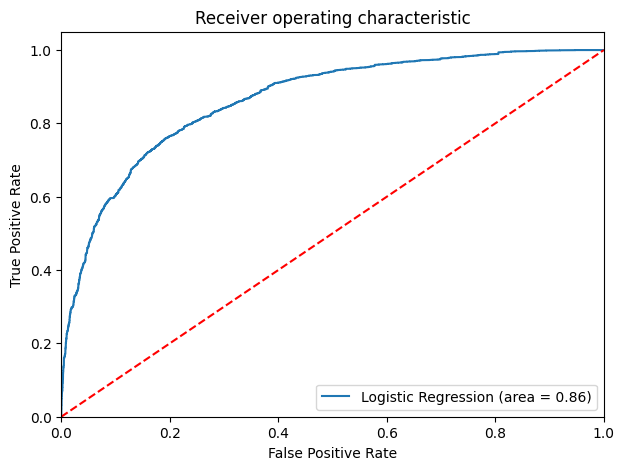

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

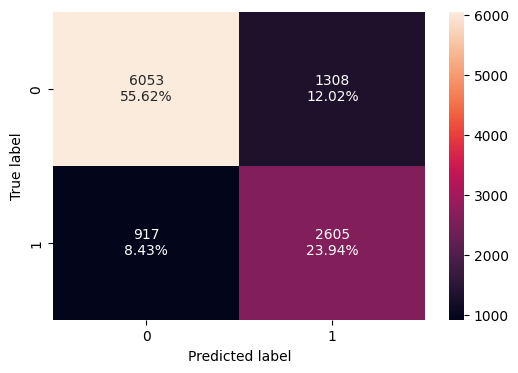

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

**Observations**

The training and test performance using the optimal_threshold_auc_roc gives almost the same results on the metrics. The F1 score is 0.70 on the test set as well. Hence the model with optimal_threshold_auc_roc of 0.37 is performing well on test set.

### Precision-Recall Curve

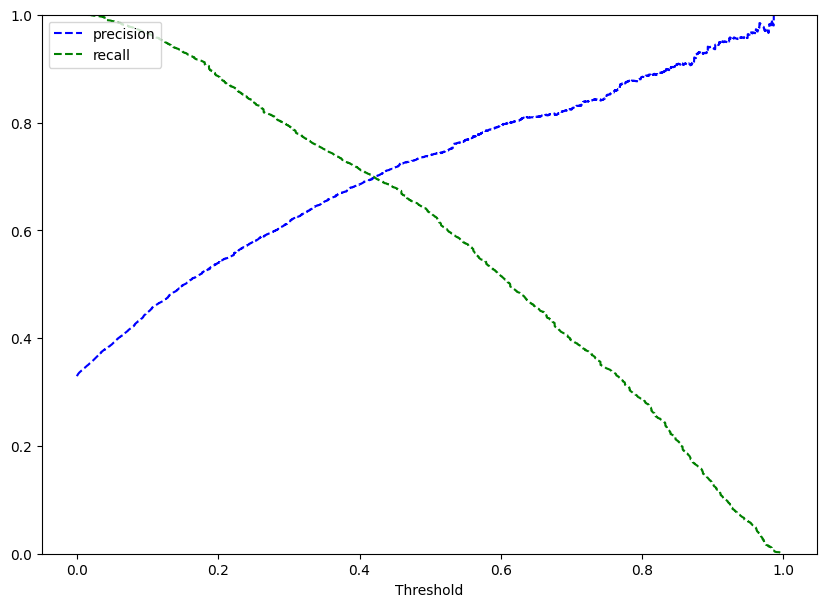

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

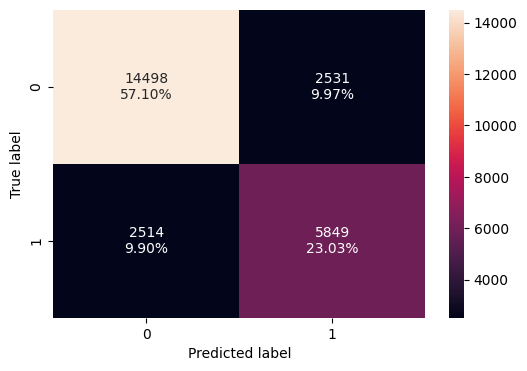

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69939    0.69797 0.69868

**Observations**
* Model is performing well on training set.
* Comparing to the model performane with the default threhold of 0.5, the Precision-Recall curve threshold of 0.42 gives a better Recall score of 0.69. The precision has reduced a bit but the F1 score is slightly better.

**Checking model performance on test set**

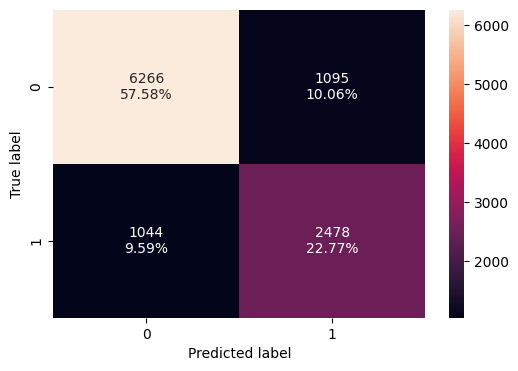

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

**Observations**

The training and test performance using the optimal_threshold_curve value of 0.42 gives almost the same results on the metrics. The F1 score is 0.69 on the test set as well. Hence the model with optimal_threshold_curve of 0.42 is performing well on test set.

## Model performance evaluation

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80545   
Recall                                         0.63267   
Precision                                      0.73907   
F1                                             0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69939  
Precision                             0.69797  
F1                                    0.69868

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80465   
Recall                                         0.63089   
Precision                                      0.72900   
F1                                             0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80345  
Recall                                0.70358  
Precision                             0.69353  
F1                                    0.69852

**Observations**

- Almost all the three models are performing well on both training and test data without the problem of overfitting.
- The model with a ROC_AUC curve threshold of 0.37 is giving the best **F1 score of 0.70** and also the Recall score is 0.74 which is higher which infers the number of False Negatives will get decreased if we use the 0.37 threshold value.Therefore it can be selected as the final model.


## Final Model Summary - Logistic Regression

The model with ROC_AUC curve threshold of **0.37** gives better results on the test set.

*   The F1 score with the ROC_AUC threshold is **0.70** and it is higher than other models meaning at the threshold of 0.37 there is a good balance between the metrics, Precision and Recall.
*   The Recall score is **0.74** which is higher than other models. Hence the number of False Negatives is less compared to other models with the threshold of 0.5 and 0.42. In this project it means that Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking will get optimized. Hence the hotel will not lose many resources and also need not bear a high additional cost.



## Building a Decision Tree model

### Data Preparation for Modeling - Decision Tree

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]
X = pd.get_dummies(X, drop_first=True)
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


Around 67% of observations belongs to class 0 (Bookings Not Canceled) and 33% observations belongs to class 1 (Bookings Canceled), and this is preserved in the train and test sets.

### Model Building - Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance Evaluation - Decision Tree


**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

**Which case is more important?**
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and the hotel should bear additional costs.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled.


**How to reduce the losses?**

* The INN Hotels would want the f1_score to be maximized, greater the f1_score score higher are the chances of minimizing the False Positives and False Negatives.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Checking model performance on training set**

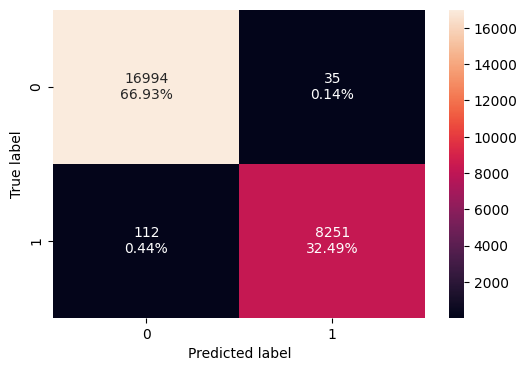

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

**Checking Model performance on test set**

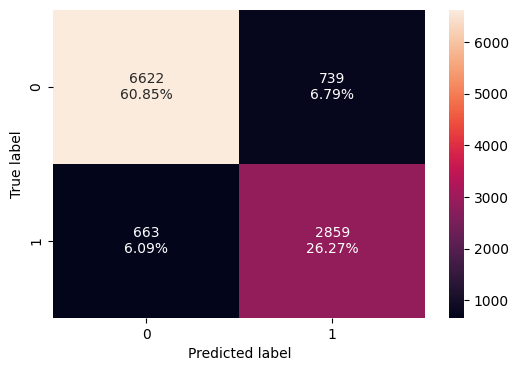

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

**Observations**

The model performs well on both training and test set. But there is a huge difference in performance of model on training set and test set, which suggests that the model is overfiiting as the precision on the test set has dropped by 20% compared to the training set and also the Recall has dropped by 18% on the test set.


## Do we need to prune the tree?

* The above generated Model is able to perfectly classify all the data points on the training set. There are close to Zero errors on the training set, each sample has been classified correctly.
* The decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

**Hence Let's use pruning techniques to try and reduce overfitting.**

**Check Important Features**

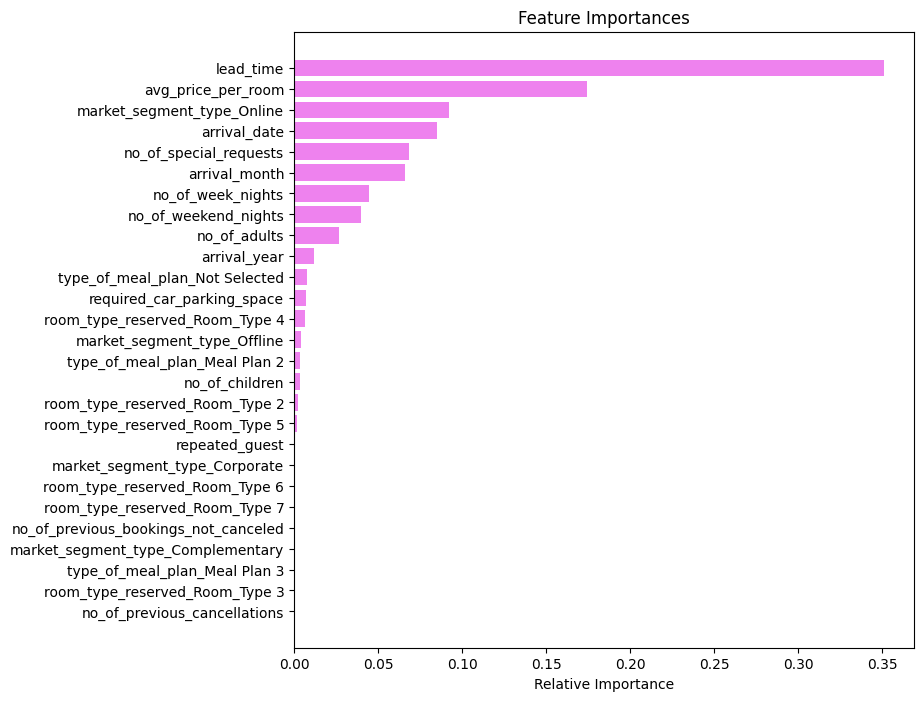

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

From the above visualization of the important features in generating the Decision tree before applying Pruning techniques, it is clear that the lead time takes the major importance in factoring the prediction of booking status of the INN Hotels, followed by average_price_per_room and market_segment_type.

### Pre-Pruning - Decision Tree

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Pre-Pruning Model - Checking model performance on training set**

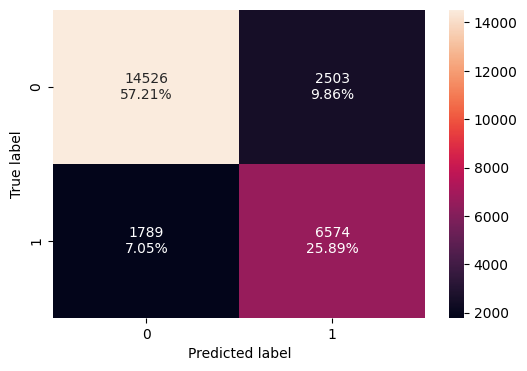

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

**Pre-Pruning Model - Checking model performance on test set**

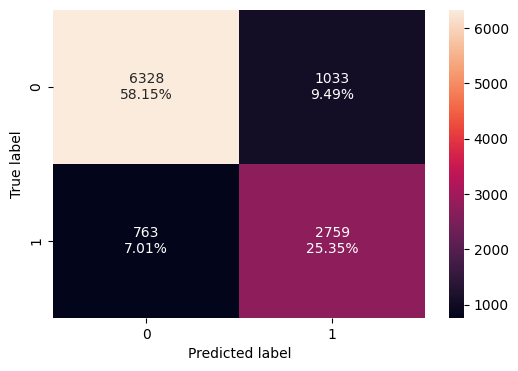

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

**Observations**

The model is giving a generalized result as all the metrics, Precsion,Recall and F1 score on both the train and test data are almost the same. The F1 score is 0.75 on test set which shows that the model is able to generalize well on unseen data.

#### Visualizing the Pre-Pruned Decision tree

Lets visualize the Pre-Pruned tree and also the important features considered in the Pre-pruning.

In [ ]:
# Fetch the important features
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

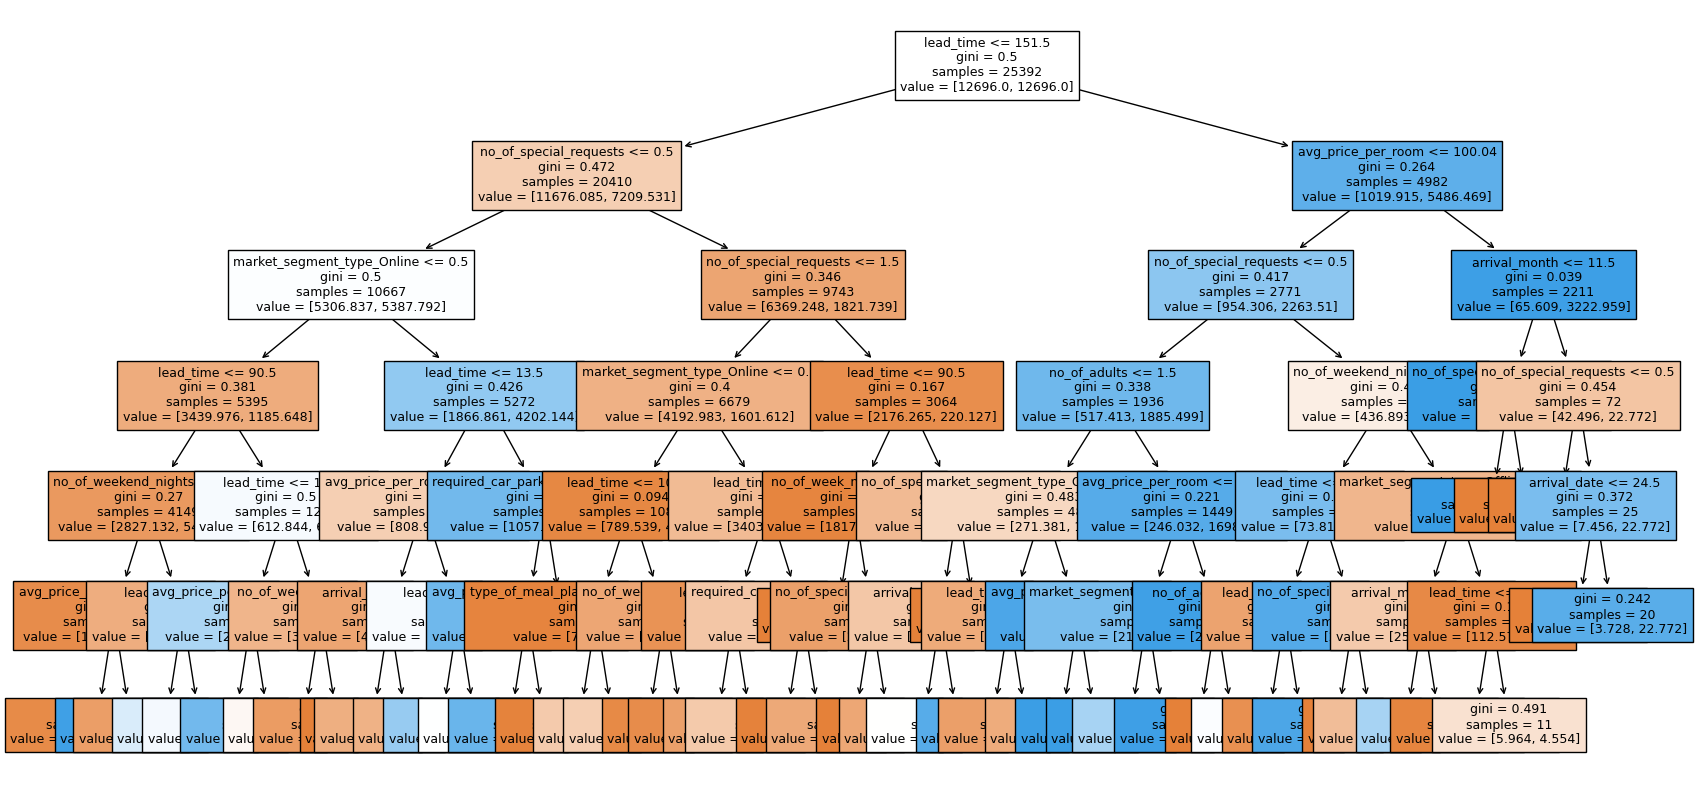

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

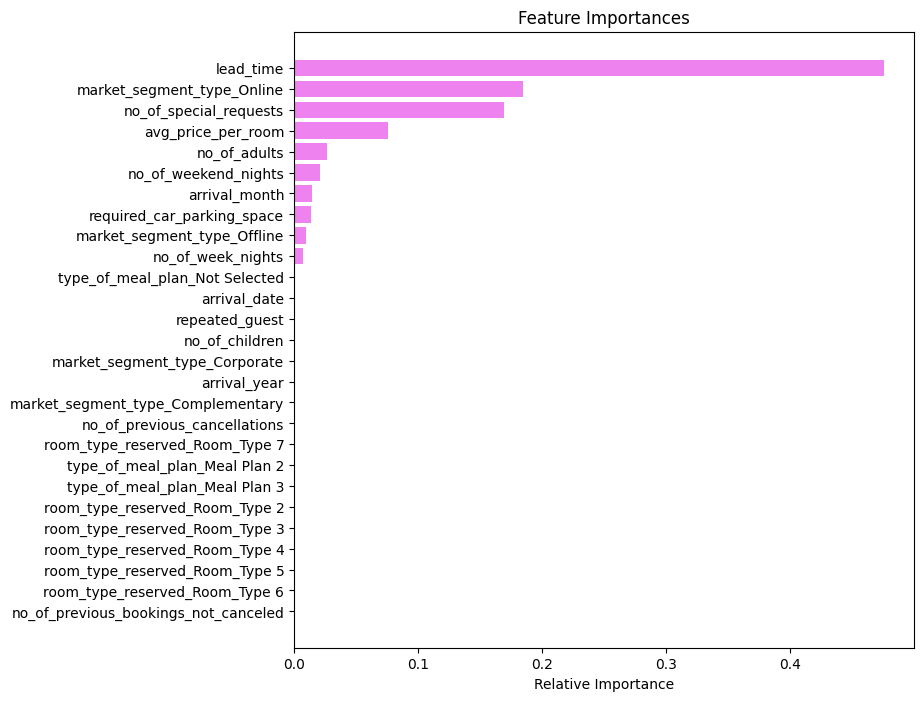

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**


*   From the above visualization of the Pre-Pruned tree we are able to see that the Lead time takes the highest importance among others. Hence Lead time is the first split in the decsion tree followed by market_segment_type_online and no_of_special_requets.
*   One of the possiblity is: If the lead_time is <=151.0, no.of.special requests is <=0.5, market_segment_type_online is <= 0.5, lead time is <=90.0, no.of weekend nights is <= 0.5 and average price per room is > 196.5 then the booking is likely to be canceled.




### Post-Pruning - Decision Tree

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

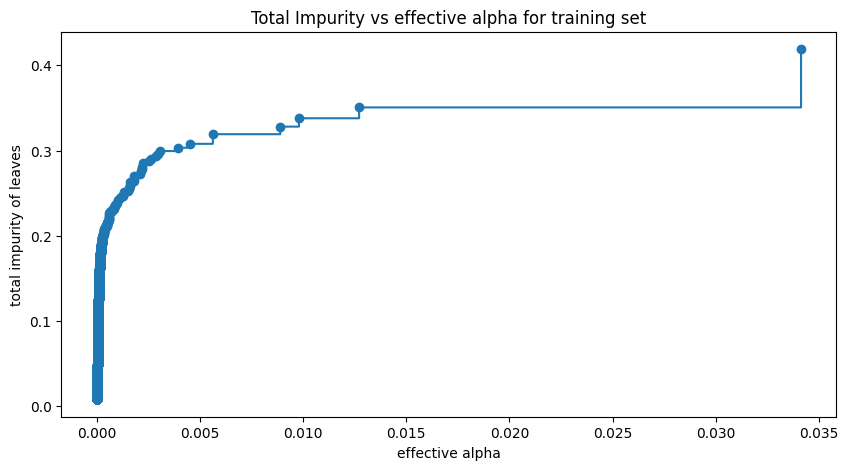

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

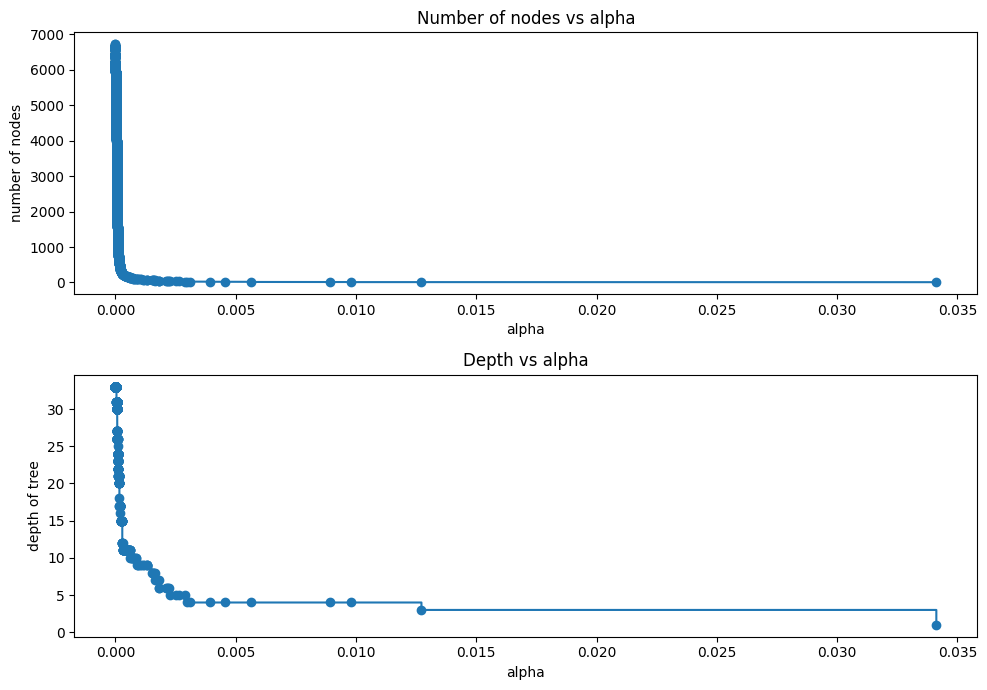

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### f1-score vs alpha

**Lets plot the f1-score vs the alpha for training and test set.**

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [ ]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
# get the train and test scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

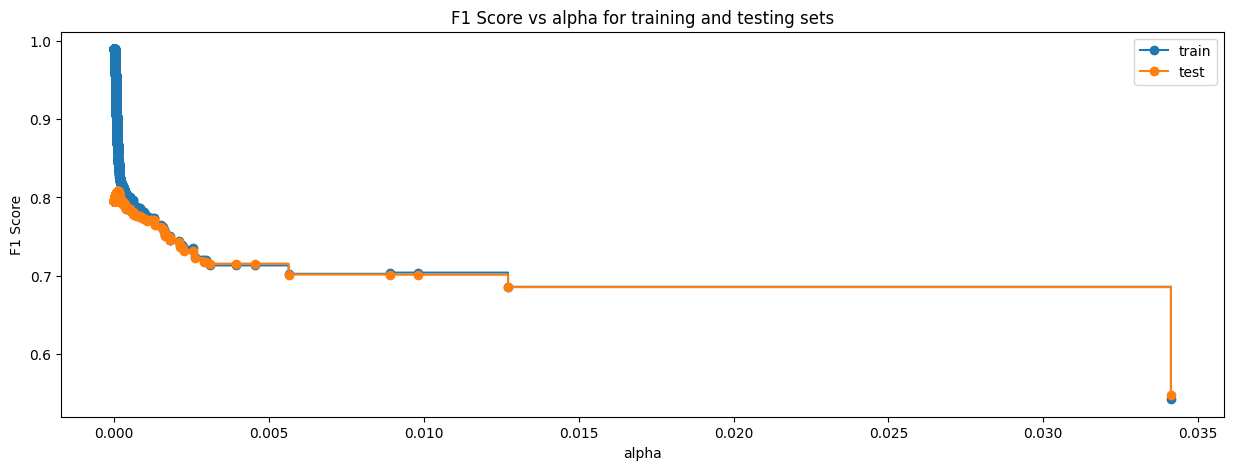

In [ ]:
# Plot f1-score and alpha for training and test set
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Observations**

As alpha increases the F1 score decreases on both training and test set.

In [ ]:
# creating the model where we get highest train and test f1-score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


**Post-Pruning Model - Checking model performance on training set**

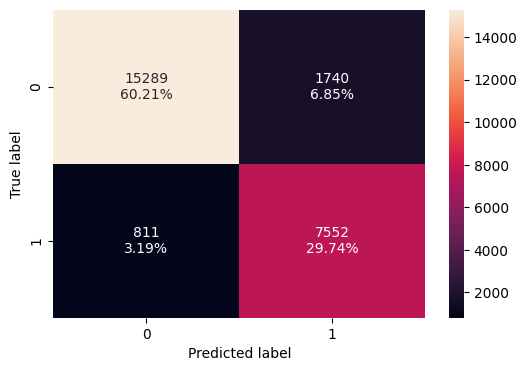

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89954 0.90303    0.81274 0.85551

**Post-Pruning Model - Checking model performance on test set**

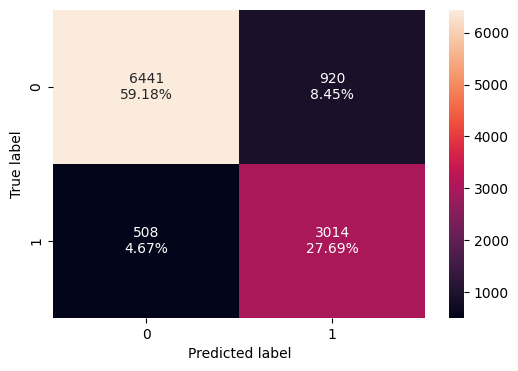

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86879 0.85576    0.76614 0.80848

**Observations**

In the post-pruned tree , the model is giving an acceptable generalized result as then difference in values of the metrics between the training and test set is not more than 5%. The F1 score is 0.80 on test set which shows that the model is able to generalize well on unseen data. The F1 score of the Post-pruned decision tree model is higher than the F1 score of the Pre-Pruned Decision tree.

### Visualizing the Post-Pruned Decision tree

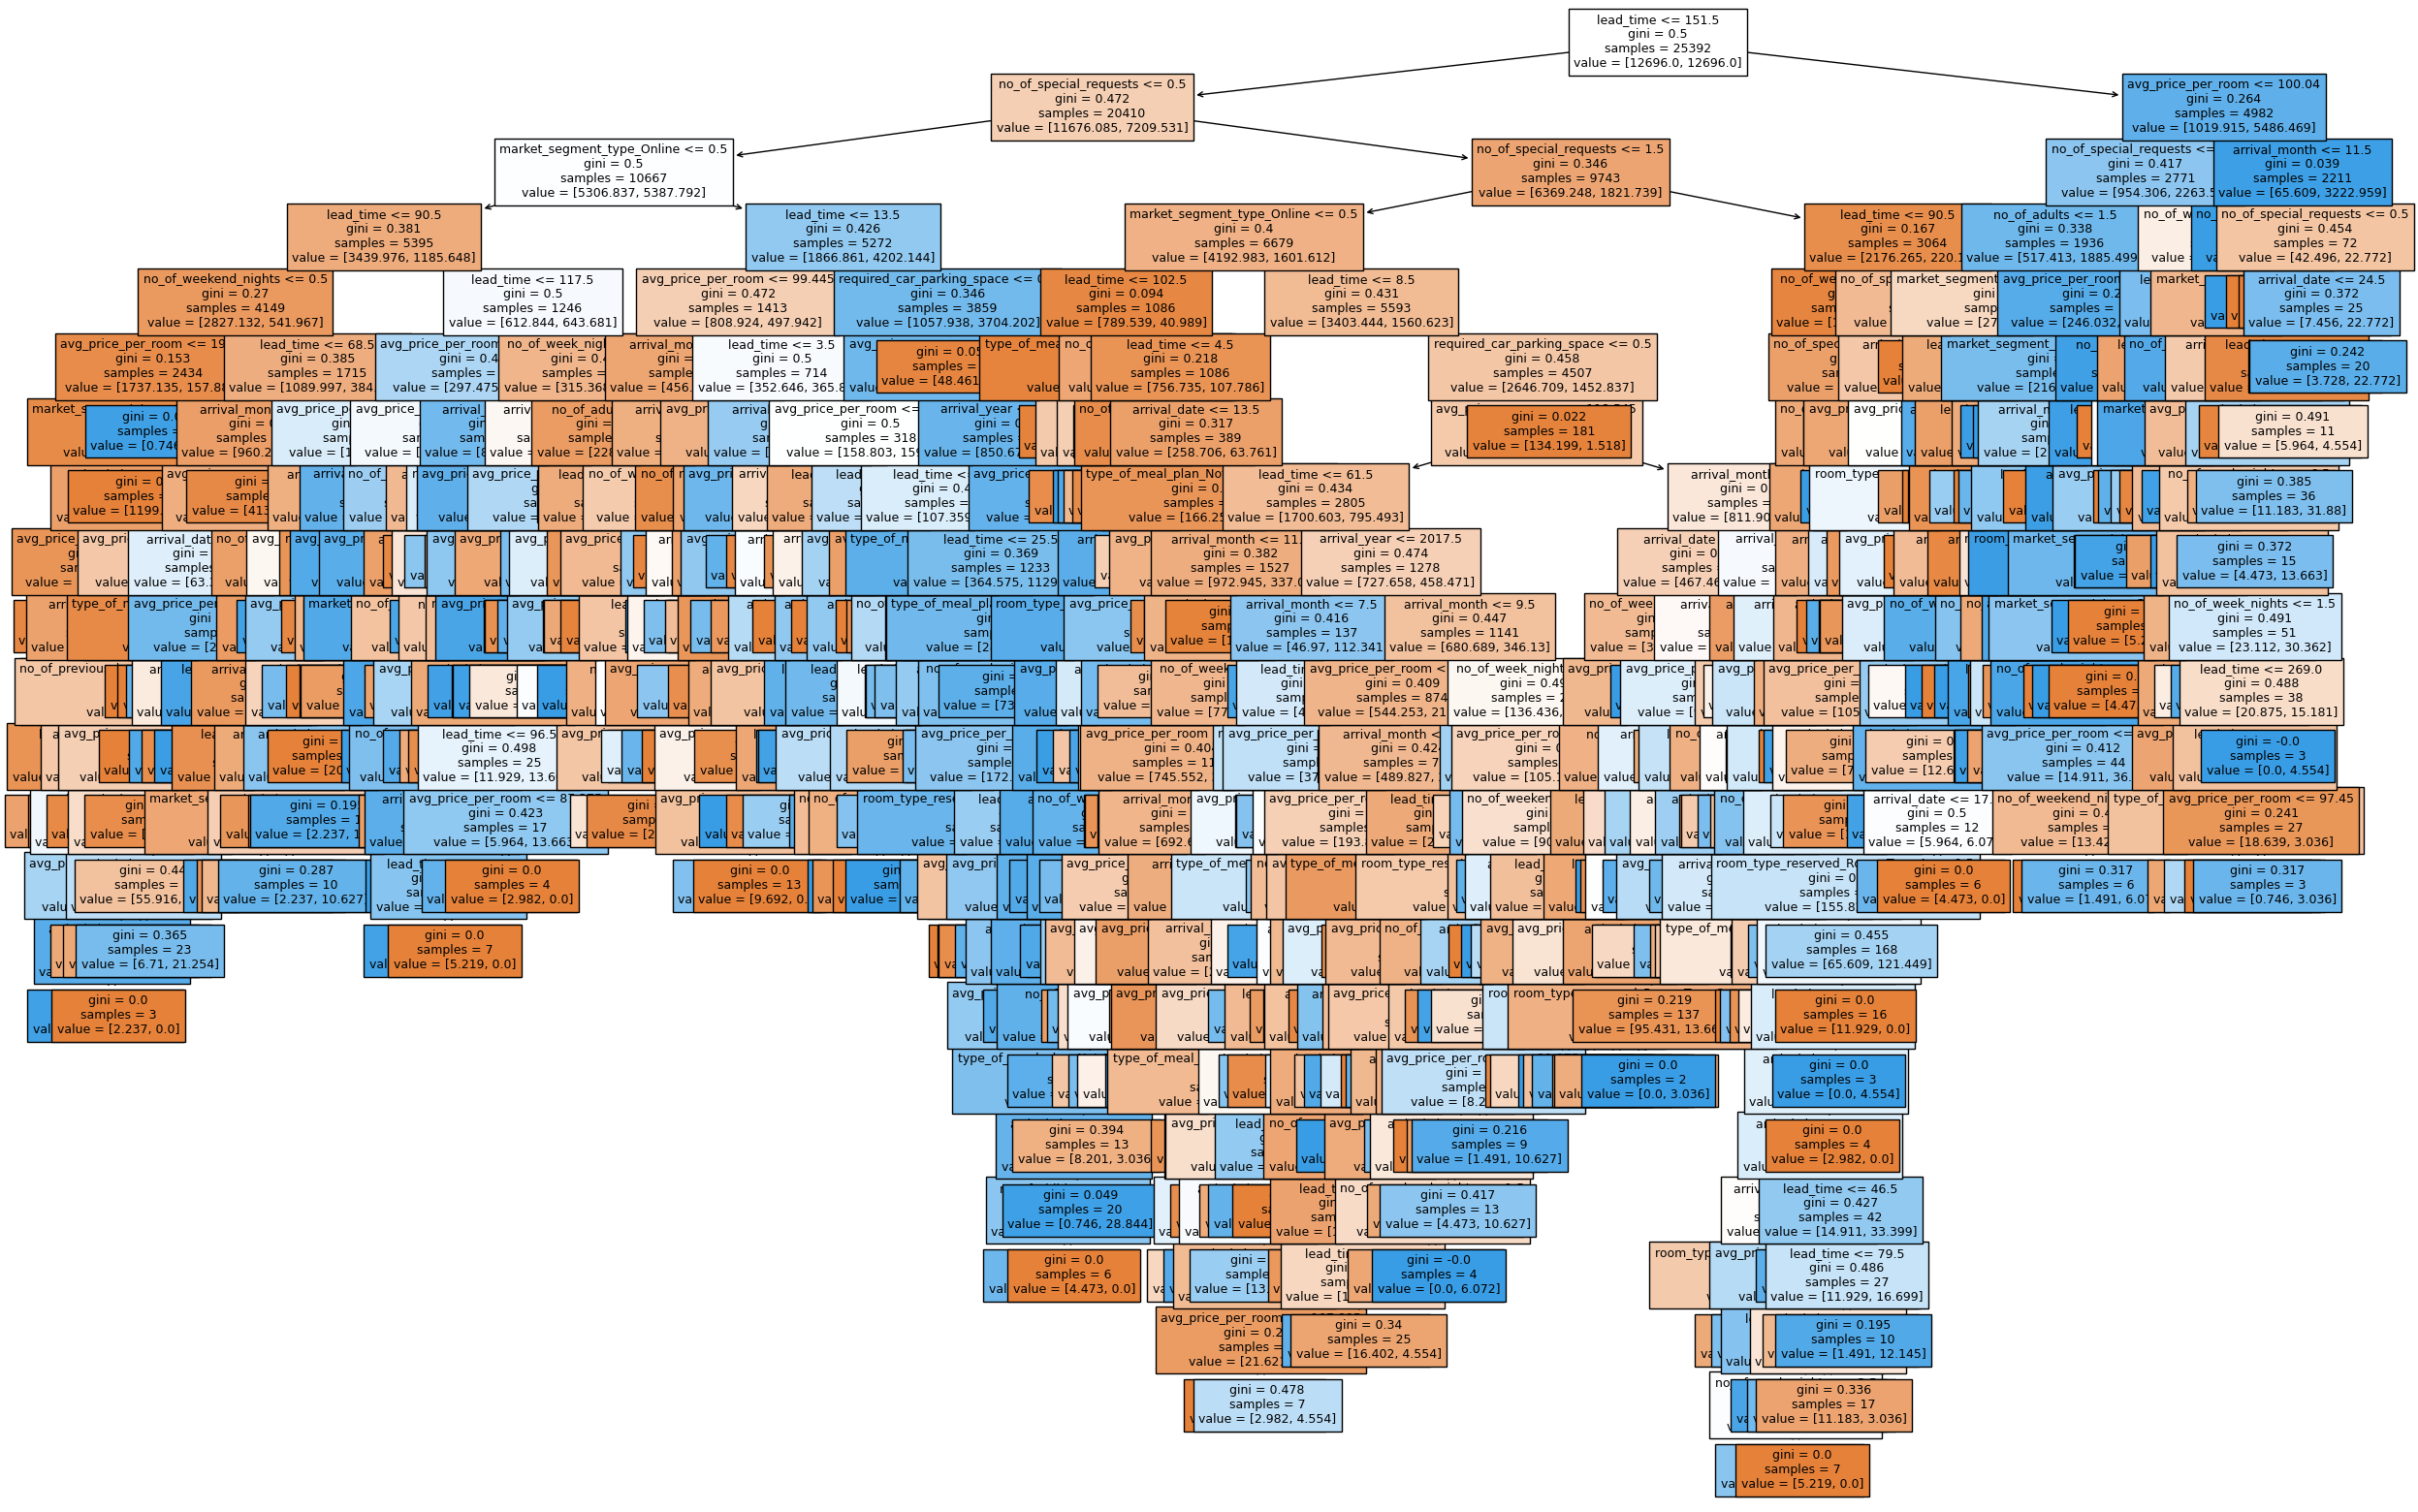

In [ ]:
plt.figure(figsize=(30, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

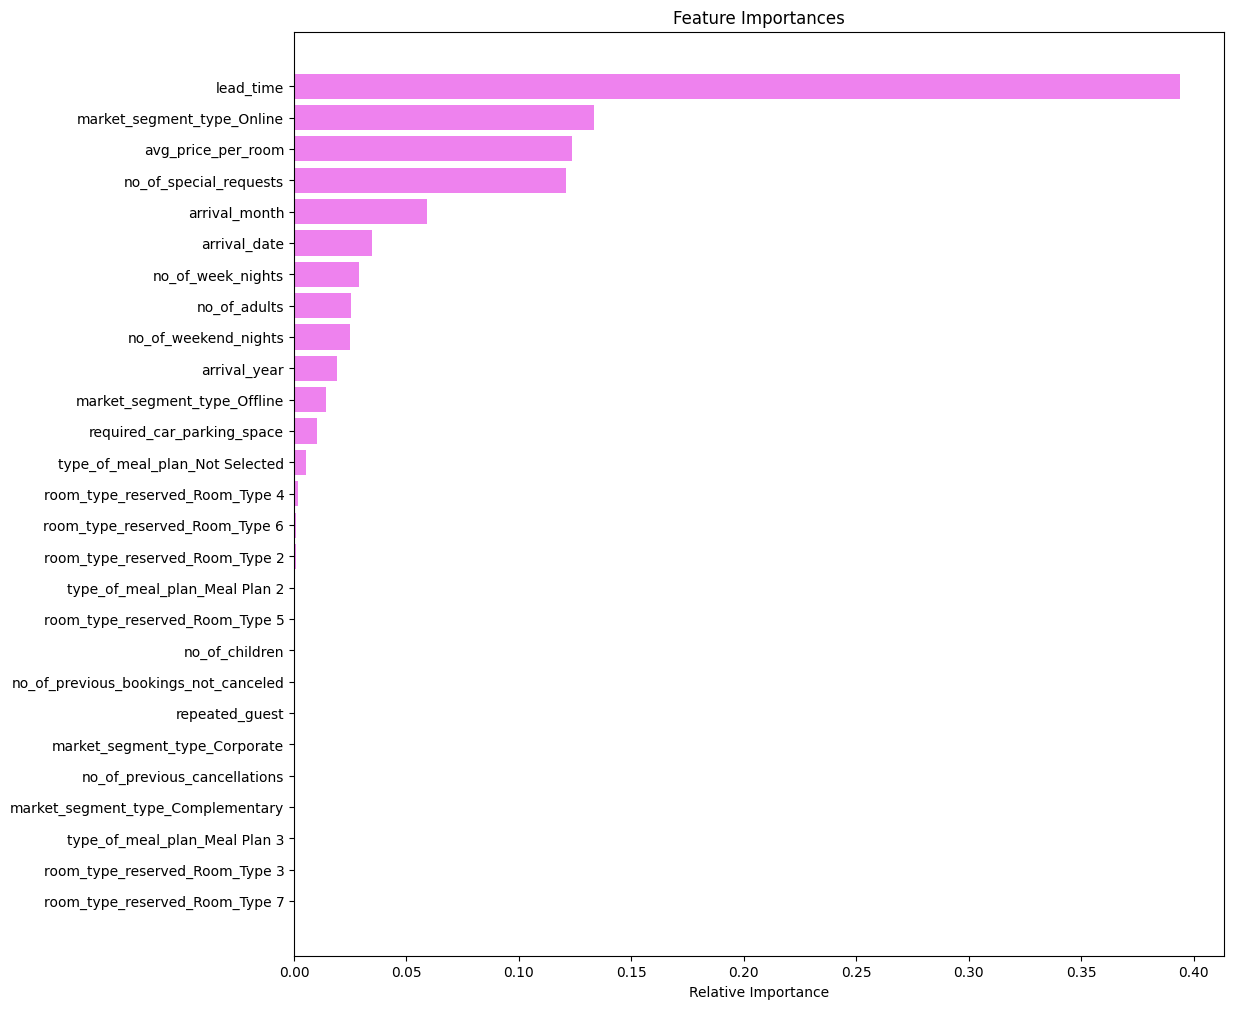

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**


*   From the above visualization of the Post-Pruned tree we are able to see that the Lead time takes the highest importance among others. Hence Lead time is the first split in the decsion tree followed by market_segment_type_online and avg_price_per_room.

## Model Performance Comparison and Conclusions - Decision Tree

Lets compare the decision tree models (Default, Pre-Pruned and Post-Pruned) and arrive at a conclusion.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83097   
Recall                   0.98661                      0.78608   
Precision                0.99578                      0.72425   
F1                       0.99117                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89954  
Recall                          0.90303  
Precision                       0.81274  
F1                              0.85551

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87118                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79461                      0.72758   
F1                       0.80309                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

**Observations**

* Decision tree models with pre-pruning gives less values on the metrics compared to the default decision tree and Post-pruned decision tree models.
* We will choose the Post pruned tree as the best model since it is giving a better Recall score on both the training and test set and also the **F1-Score is 0.808** which is higher in the Post-Pruned decision tree compared to other models with respect to the performance on the test set.

## Actionable Insights and Recommendations


- The model built using Logistic regression with the threshold of 0.37 can be used to predict if the INN Hotels booking is going to get canceled or not and can correctly identify 73% of the booking cancelations and gives a F1 score of 0.70.

- The model built using Decision tree with Post-Pruning can be used to predict if the INN Hotels booking is going to get canceled or not and can correctly identify 85% of the booking cancelations and gives a F1 score of 0.80.

- The Decision tree algorithm gives better results than the Logistic regression.

- Lead time, market segment type Online, average price per room and number of special requests are some of the important features that can predict booking cancelations of the INN Hotels.

- From the decision tree, it has been observed that If the lead_time is <=151.0, no.of.special requests is <=0.5, market_segment_type_online is <= 0.5, lead time is <=90.0, no.of weekend nights is <= 0.5, average price per room is <=196.5, market_segment_type_offline is <=0.5,lead_time is <=16.5, average price per room is >68.5,arrival_date is <=29.5, no_of_adults is <=1.5 then the booking is likely to be canceled.

- The INN Hotels should give more importance to the above mentioned features and the corresponding values in order to predict booking cancelations.


- The INN Hotels should fetch more data for the analysis in order to get more precise and reliable results.


- The INN Hotels should have a boundary on the lead time while the customer makes the reservation as higher the lead time more likely the customer cancels the booking. Hence the INN Hotels can set the bound on the lead time of less than an year.

- The INN Hotels gets more bookings during the month of October, September and August but the number of bookings getting canceled are also high during these months. Hence the INN Hotels must have a vigilant eye during these months on the factors that might impact the cancelations and can provide dicsountable rates on the room price and assign more resources and funds towards their marketing campaign during this peak season in order to attract customers so as to reduce the number of cancelations and also be competitive on the market.

- During the initial months of the year January and February the number of bookings is very less. The INN Hotels can attract more customers during this time by reducing the price of the room compared to other hotels and also giving reward points for the customers booking during this time so that the INN Hotels will get repeated customers.
